In [ ]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Load data from csv file
data = pd.read_csv('CII-VNINDEX-History.csv')
data_vn = data.copy()
data_vn.head(10)

,Unnamed: 0,Open,High,Low,Close,Volume,TradingDate
0,0,10850.0,10563.0,10563.0,10563.0,275600,2006-05-18
1,1,10308.0,10032.0,10032.0,10032.0,443520,2006-05-19
2,2,9809.0,9548.0,9548.0,9548.0,64200,2006-05-22
3,3,9331.0,9079.0,9079.0,9079.0,12760,2006-05-23
4,4,8876.0,8641.0,8641.0,8641.0,46460,2006-05-24
5,5,8442.0,8218.0,8218.0,8218.0,156690,2006-05-25
6,6,8029.0,7818.0,7818.0,7818.0,40310,2006-05-26
7,7,7639.0,7434.0,7434.0,7434.0,65110,2006-05-29
8,8,7270.0,7073.0,7073.0,7073.0,19540,2006-05-30
9,9,6922.0,6734.0,6734.0,6734.0,31850,2006-05-31


In [ ]:
data_vn = data_vn.copy()
data_vn.drop(columns=['Unnamed: 0'], inplace=True)
data_vn.head()

,Open,High,Low,Close,Volume,TradingDate
0,10850.0,10563.0,10563.0,10563.0,275600,2006-05-18
1,10308.0,10032.0,10032.0,10032.0,443520,2006-05-19
2,9809.0,9548.0,9548.0,9548.0,64200,2006-05-22
3,9331.0,9079.0,9079.0,9079.0,12760,2006-05-23
4,8876.0,8641.0,8641.0,8641.0,46460,2006-05-24


In [ ]:
data_vn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4186 entries, 0 to 4185
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         4186 non-null   float64
 1   High         4186 non-null   float64
 2   Low          4186 non-null   float64
 3   Close        4186 non-null   float64
 4   Volume       4186 non-null   int64  
 5   TradingDate  4186 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 196.3+ KB


# Preprocess

In [ ]:
data_vn.iloc[:, slice(None, -1)].head()

,Open,High,Low,Close,Volume
0,10850.0,10563.0,10563.0,10563.0,275600
1,10308.0,10032.0,10032.0,10032.0,443520
2,9809.0,9548.0,9548.0,9548.0,64200
3,9331.0,9079.0,9079.0,9079.0,12760
4,8876.0,8641.0,8641.0,8641.0,46460


In [ ]:
import preprocess as pp

In [ ]:
data_slice = slice(None,-1)
samples = pp.get_data_samples_kth_day(data_vn, 1, data_slice, label_colID=-3)

In [ ]:
data_vn.iloc[30:, :]

,Open,High,Low,Close,Volume,TradingDate
30,7161.0,6973.0,6952.0,6973.0,64250,2006-06-29
31,7161.0,7242.0,6967.0,7242.0,140080,2006-06-30
32,7378.0,7184.0,7142.0,7142.0,33510,2006-07-03
33,7270.0,7142.0,7078.0,7142.0,55160,2006-07-04
34,7335.0,7140.0,7119.0,7119.0,12850,2006-07-05
...,...,...,...,...,...,...
4181,13950.0,14150.0,13500.0,13500.0,3662517,2023-02-22
4182,13500.0,13650.0,13000.0,13500.0,2814643,2023-02-23
4183,13650.0,13650.0,13150.0,13150.0,1366663,2023-02-24
4184,13000.0,13450.0,12850.0,12950.0,1975666,2023-02-27


In [ ]:
X_data = samples[0]
y_data = samples[1]
print(y_data[0])

[6973.]


# MODELS

## input shape

In [ ]:
window_size=30

In [ ]:
num_features = pp.get_num_features(data_slice, data_vn)
num_features

5

## LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Dropout, Bidirectional

def create_lstm(input_shape):
  # Define the model
  model_lstm = Sequential([
      LSTM(32, input_shape=input_shape, return_sequences=True),
      Dropout(0.2),
      LSTM(128, return_sequences=False),
      Dropout(0.1),
      Dense(100, activation='relu'),
      Dense(1)
  ])
  return model_lstm

In [ ]:
model_lstm = create_lstm((window_size, num_features))
model_lstm.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 32)              │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │          82,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100,297 (391.79 KB)

 Trainable params: 100,297 (391.79 KB)

 Non-trainable params: 0 (0.00 B)

## GRU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.layers import Dropout, Bidirectional

def create_gru(input_shape):
  # Define the model
  model_gru = Sequential([
      GRU(32, input_shape=input_shape, return_sequences=True),
      GRU(128, return_sequences=False),
      Dropout(0.1),
      Dense(100, activation='relu'),
      Dense(1)
  ])
  return model_gru

In [ ]:
model_gru = create_gru((window_size, num_features))
model_gru.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 30, 32)              │           3,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 128)                 │          62,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 78,953 (308.41 KB)

 Trainable params: 78,953 (308.41 KB)

 Non-trainable params: 0 (0.00 B)

##BiLSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Dropout, Bidirectional

def create_bilstm(input_shape):
  # Define the model
  model_bilstm = Sequential([
      LSTM(32, input_shape=input_shape, return_sequences=True),
      Bidirectional(LSTM(128, return_sequences=False)),
      Dropout(0.2),
      Dense(100, activation='relu'),
      Dense(1)
  ])
  return model_bilstm

In [ ]:
model_bilstm = create_bilstm((window_size, num_features))
model_bilstm.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 30, 32)              │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 256)                 │         164,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          25,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 195,529 (763.79 KB)

 Trainable params: 195,529 (763.79 KB)

 Non-trainable params: 0 (0.00 B)

## BiGRU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.layers import Dropout, Bidirectional

def create_bigru(input_shape):
  # Define the model
  model_bigru = Sequential([
      GRU(32, input_shape=input_shape, return_sequences=True),
      Bidirectional(GRU(128, return_sequences=False)),
      Dropout(0.2),
      Dense(100, activation='relu'),
      Dense(1)
  ])
  return model_bigru

In [ ]:
model_bigru = create_bigru((window_size, num_features))
model_bigru.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 30, 32)              │           3,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 256)                 │         124,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          25,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 153,961 (601.41 KB)

 Trainable params: 153,961 (601.41 KB)

 Non-trainable params: 0 (0.00 B)

# FUNCTIONS

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD, Nadam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import tensorflow as tf
# Adjust the optimizer and learning rate
#optimizer = Adam(learning_rate=0.001)
def compile(model, optimizer):
  model.compile(
      loss='mean_squared_error',
      optimizer=optimizer,
      metrics=['mae']
  )
def get_callbacks(file_path):
  # Training callbacks
  callbacks = [
      EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
      ModelCheckpoint(filepath=file_path, monitor='val_loss', save_best_only=True),
      ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
  ]
  return callbacks

def train_history(model, batch_size, epochs, callbacks, X_train_norm, y_train_norm, validation_data):
  # Fit the model with data augmentation
  model_training_history = model.fit(
      X_train_norm, y_train_norm,
      batch_size=batch_size,
      epochs=epochs,
      validation_data=(X_val_norm, y_val_norm),
      callbacks=callbacks
  )
  return model_training_history

In [ ]:
def plot_performance(history):
    # Create a figure with 1 row and 2 columns for side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot loss
    axes[0].plot(history.history['loss'], color='b',label='Training Loss')
    axes[0].plot(history.history['val_loss'], color='r',label='Validation Loss')
    axes[0].set_title('Model Loss')
    axes[0].set_ylabel('Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].legend(['Train', 'Val'], loc='upper right')

    # Plot mae
    axes[1].plot(history.history['mae'], color='b',label='Training MAE')
    axes[1].plot(history.history['val_mae'], color='r',label='Validation MAE')
    axes[1].set_title('Model mae')
    axes[1].set_ylabel('mae')
    axes[1].set_xlabel('Epoch')
    axes[1].legend(['Train', 'Val'], loc='upper left')

    # Display the plots
    plt.tight_layout()
    plt.show()


In [ ]:
# Evaluate
from sklearn.metrics import mean_squared_error

def get_model_n_evaluate(model_path, X_test_norm, y_test_norm):
  model = tf.keras.models.load_model(model_path)
  result = model.evaluate(X_test_norm, y_test_norm)
  print(model.metrics_names) # result_1d[0] is loss, result_1d[1] is mse. The metrics are defined in model_1d.complie(...)
  print("Loss and mae on the test set: loss = {}, mae = {}".format(result[0],result[1]))
  return model

def get_reverse_prediction(loaded_model, X_test_norm, y_scaler):
  # Get prediction on the test data
  y_pred_norm = loaded_model.predict(X_test_norm)
  print("MSE on the test set: ", mean_squared_error(y_pred_norm, y_test_norm))

  # Now, to denormalize the norm data back to the original scale:
  y_pred_denorm = y_scaler.inverse_transform(y_pred_norm)

  # Check the shapes
  print("Shape of denormalized training set: ", y_pred_denorm.shape)
  return y_pred_denorm


In [ ]:
# Visualize preditec stock price versus real stock price
def plot_prediction(y_pred_denorm, y_test, title):
  plt.figure(figsize=(16, 8), dpi=300)
  plt.plot(y_pred_denorm, label='Predicted price')
  plt.plot(y_test, label='Real price')
  plt.title('Stock trend prediction in one day', fontsize=16)
  plt.xlabel('Time (days)', fontsize=14)
  plt.ylabel('Close price in $', fontsize=14)
  plt.grid() # Add grid
  plt.legend() # Add legend
  plt.show()

In [ ]:
def plot_prediction_timestep(y_pred_denorm, y_test, title, time_steps=np.arange(0, 1)):
  plt.figure(figsize=(16, 8), dpi=300)
  # Plot for the first sample only
  plt.plot(time_steps, y_pred_denorm[10], label='Predicted Prices', linestyle='--', marker='o')
  plt.plot(time_steps, y_test[10], label='Real Prices', linestyle='-', marker='x')

  # Add titles, labels, and legend
  plt.title('Predicted vs Real Open Prices Over the Next Day for Sample 10th', fontsize=16)
  plt.xlabel('Days', fontsize=14)
  plt.ylabel('Close Price in $', fontsize=14)
  plt.xticks(time_steps)  # Set x-ticks to represent days
  plt.grid()  # Add grid
  plt.legend()  # Add legend
  plt.show()


# time series split train

In [ ]:
# Step 1: Split to train and test set
from sklearn.model_selection import train_test_split
import numpy as np # Import numpy


# Split the entire dataset into train (80%) and test (20%)
X_train_full, X_test, y_train_full, y_test = train_test_split(X_data, y_data,
                                                              test_size=0.2,
                                                              random_state=42,
                                                              shuffle=False)

# Convert X_train_full and y_train_full to NumPy arrays
X_train_full = np.array(X_train_full) # Convert to NumPy array
y_train_full = np.array(y_train_full) # Convert to NumPy array
X_test = np.array(X_test) # Convert to NumPy array
y_test = np.array(y_test) # Convert to NumPy array

In [ ]:
from sklearn.preprocessing import MinMaxScaler

y_scaler = MinMaxScaler()
# Reshape each feature (axis=-1) for scaling
X_train_norm = X_train_full.copy()
#X_val_norm = X_val.copy()
X_test_norm = X_test.copy()

# Loop through each feature (axis=2) and scale across time and samples
for i in range(X_train_full.shape[2]):
    # Flatten the data for the i-th feature and apply MinMaxScaler
    scaler = MinMaxScaler()
    X_train_norm[:, :, i] = scaler.fit_transform(X_train_full[:, :, i])
    #X_val_norm[:, :, i] = scaler.transform(X_val[:, :, i])
    X_test_norm[:, :, i] = scaler.transform(X_test[:, :, i])

    y_train_norm = y_scaler.fit_transform(y_train_full)
    #y_val_norm = y_scaler.transform(y_val)
    y_test_norm = y_scaler.transform(y_test)


# Check the new shapes (they should remain the same as before)
print("Shape of scaled training set: ", X_train_norm.shape)
#print("Shape of scaled validation set: ", X_val_norm.shape)
print("Shape of scaled test set: ", X_test_norm.shape)
print()
print("Shape of scales training label ", y_train_norm.shape)
#print("Shape of scales validation label ", y_val_norm.shape)
print("Shape of scales test label ", y_test_norm.shape)

Shape of scaled training set:  (3324, 30, 5)
Shape of scaled test set:  (831, 30, 5)

Shape of scales training label  (3324, 1)
Shape of scales test label  (831, 1)


In [ ]:
# Step 2: Time series split for training set
from sklearn.model_selection import TimeSeriesSplit

# Create a TimeSeriesSplit object with 5 splits
tscv = TimeSeriesSplit(n_splits=5)
loss_score = []

mc = keras.callbacks.ModelCheckpoint(filepath="/content/model_gru_ts.keras", # Path to save the model
                                     monitor='val_loss', # Metric to evaluate the model performance when looking for a better model.
                                     mode='min', # mode='auto'/'max'/'min': the monitor should be max/min to be better.
                                                 # In auto mode, the mode is set to max if the quantities monitored are 'acc' or start with 'fmeasure' (f-score) and are set to min for the rest of the quantities.
                                     verbose=0, # Inform every time a better model is found and saved.
                                     save_best_only=True) # Only save the model if the current training epoch is the best. 'False' means save models of all training epochs

# Loop through each split generated by TimeSeriesSplit
for train_index, val_index in tscv.split(X_train_norm):
    # Use different variable names for clarity
    X_train_split, X_val = X_train_norm[train_index], X_train_norm[val_index]
    y_train_split, y_val = y_train_norm[train_index], y_train_norm[val_index]

    X_train = np.array(X_train_split)
    X_val = np.array(X_val)
    y_train = np.array(y_train_split)
    y_val = np.array(y_val)
    # Reshape the numpy array to fit the neural network input shape requirement
    X_train = X_train.reshape(X_train.shape[0], window_size, num_features)
    X_val = X_val.reshape(X_val.shape[0], window_size, num_features)
    #X_test = X_test.reshape(X_test.shape[0], window_size, num_features)
    model_gru = create_gru((window_size, num_features))
    model_gru.compile(loss='mean_squared_error', optimizer='Nadam', metrics=['mae'])
    # Train the model. Using Colab for training
    history_gru_ts = model_gru.fit(X_train, y_train, # Data feature and data label
                    batch_size=2048, # Batch size
                    epochs=24, # Number of training epochs
                    validation_data=(X_val, y_val), # Validation set
                    callbacks=[mc]) # Use callback ModelCheckpoint during the training
    loss= model_gru.evaluate(X_val, y_val)
    loss_score.append(loss)
    print(f"Validation loss for fold: {loss}")

print(f"Mean validation loss: {np.mean(loss_score)}")
print(f"Standard deviation of validation loss: {np.std(loss_score)}")

Epoch 1/24


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 0.0484 - mae: 0.1917 - val_loss: 0.0243 - val_mae: 0.1344
Epoch 2/24
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step - loss: 0.0203 - mae: 0.1182 - val_loss: 0.0104 - val_mae: 0.0863
Epoch 3/24
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step - loss: 0.0084 - mae: 0.0710 - val_loss: 0.0027 - val_mae: 0.0464
Epoch 4/24
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step - loss: 0.0027 - mae: 0.0430 - val_loss: 0.0012 - val_mae: 0.0269
Epoch 5/24
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step - loss: 0.0016 - mae: 0.0343 - val_loss: 0.0013 - val_mae: 0.0283
Epoch 6/24
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step - loss: 0.0017 - mae: 0.0355 - val_loss: 0.0011 - val_mae: 0.0261
Epoch 7/24
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step - loss: 0.0016 - mae: 0.0344 - val_loss: 9.8261e-04 - val_mae: 0.0245
Epoch 8/24
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step - loss: 0.0014 - mae: 0.0325 - val_loss: 8.2366e-04 - val_mae: 0.0222
Epoch 9/24
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - loss: 0.0012 - mae: 0.0301

In [ ]:
print("=========GRU===========")
model_gru_ts = get_model_n_evaluate("/content/model_gru_ts.keras", X_test_norm, y_test_norm)
y_pred_denom_gru_ts = get_reverse_prediction(model_gru_ts, X_test_norm, y_scaler)

=========GRU===========
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0018 - mae: 0.0234
['loss', 'compile_metrics']
Loss and mae on the test set: loss = 0.0033143488690257072, mae = 0.031032433733344078
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
MSE on the test set:  0.003314348890208121
Shape of denormalized training set:  (831, 1)


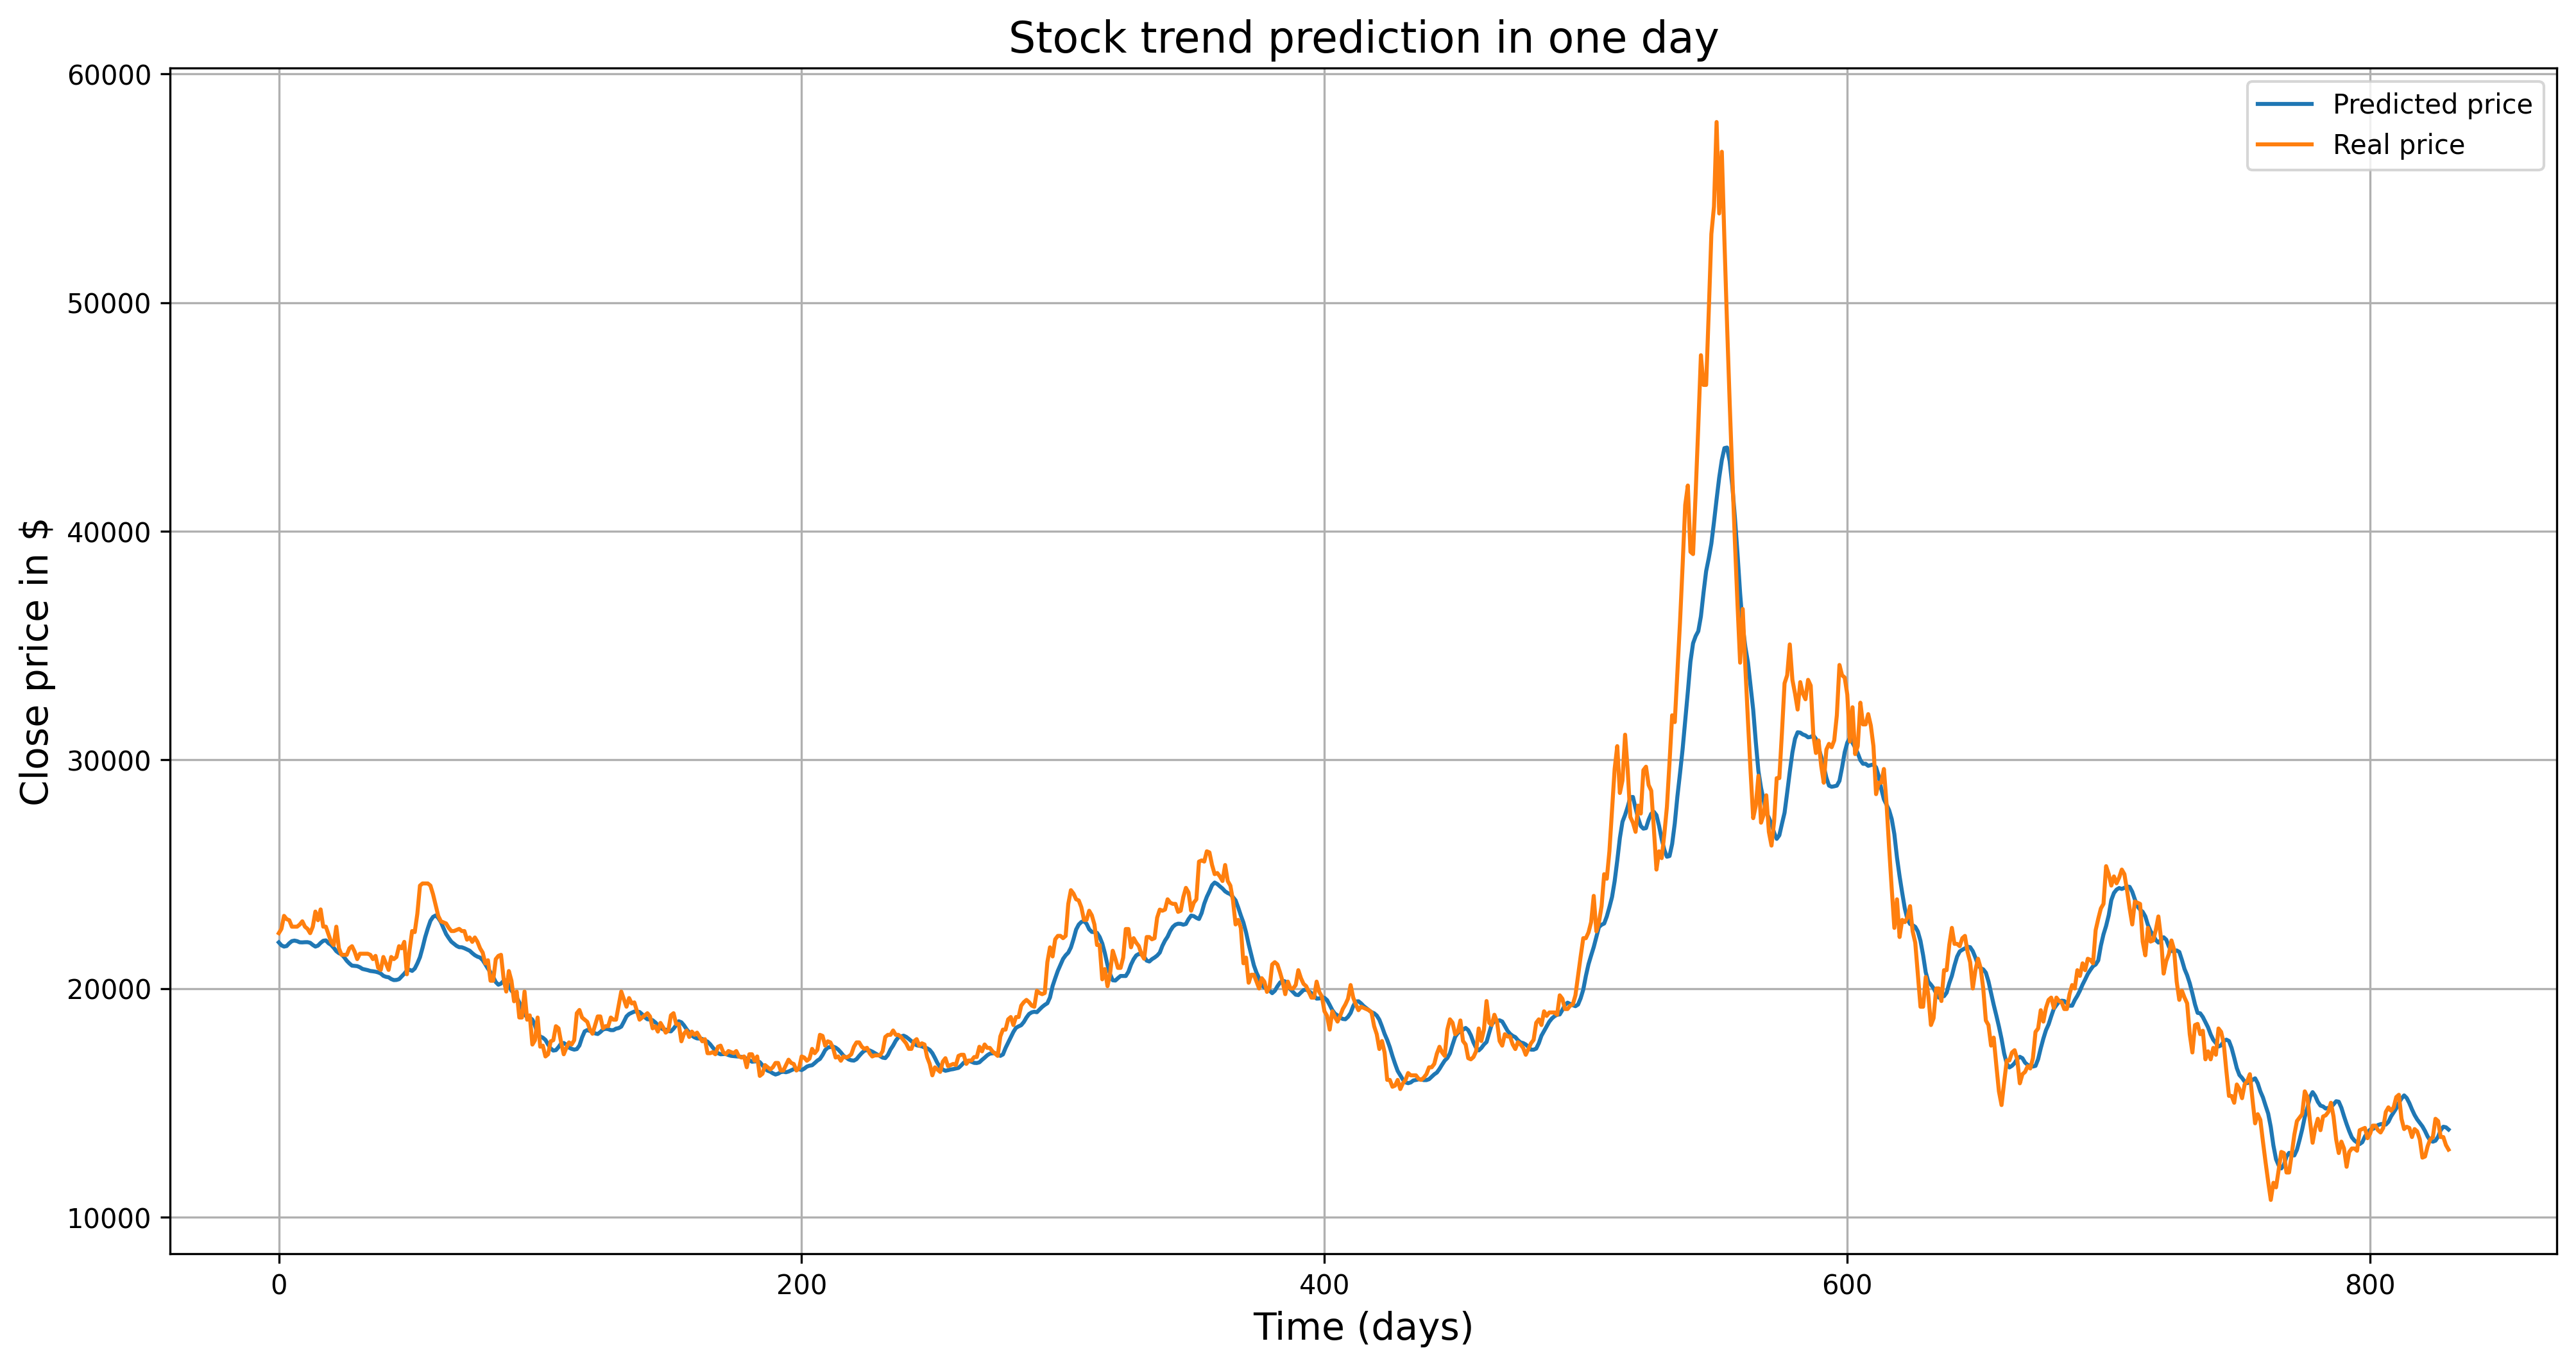

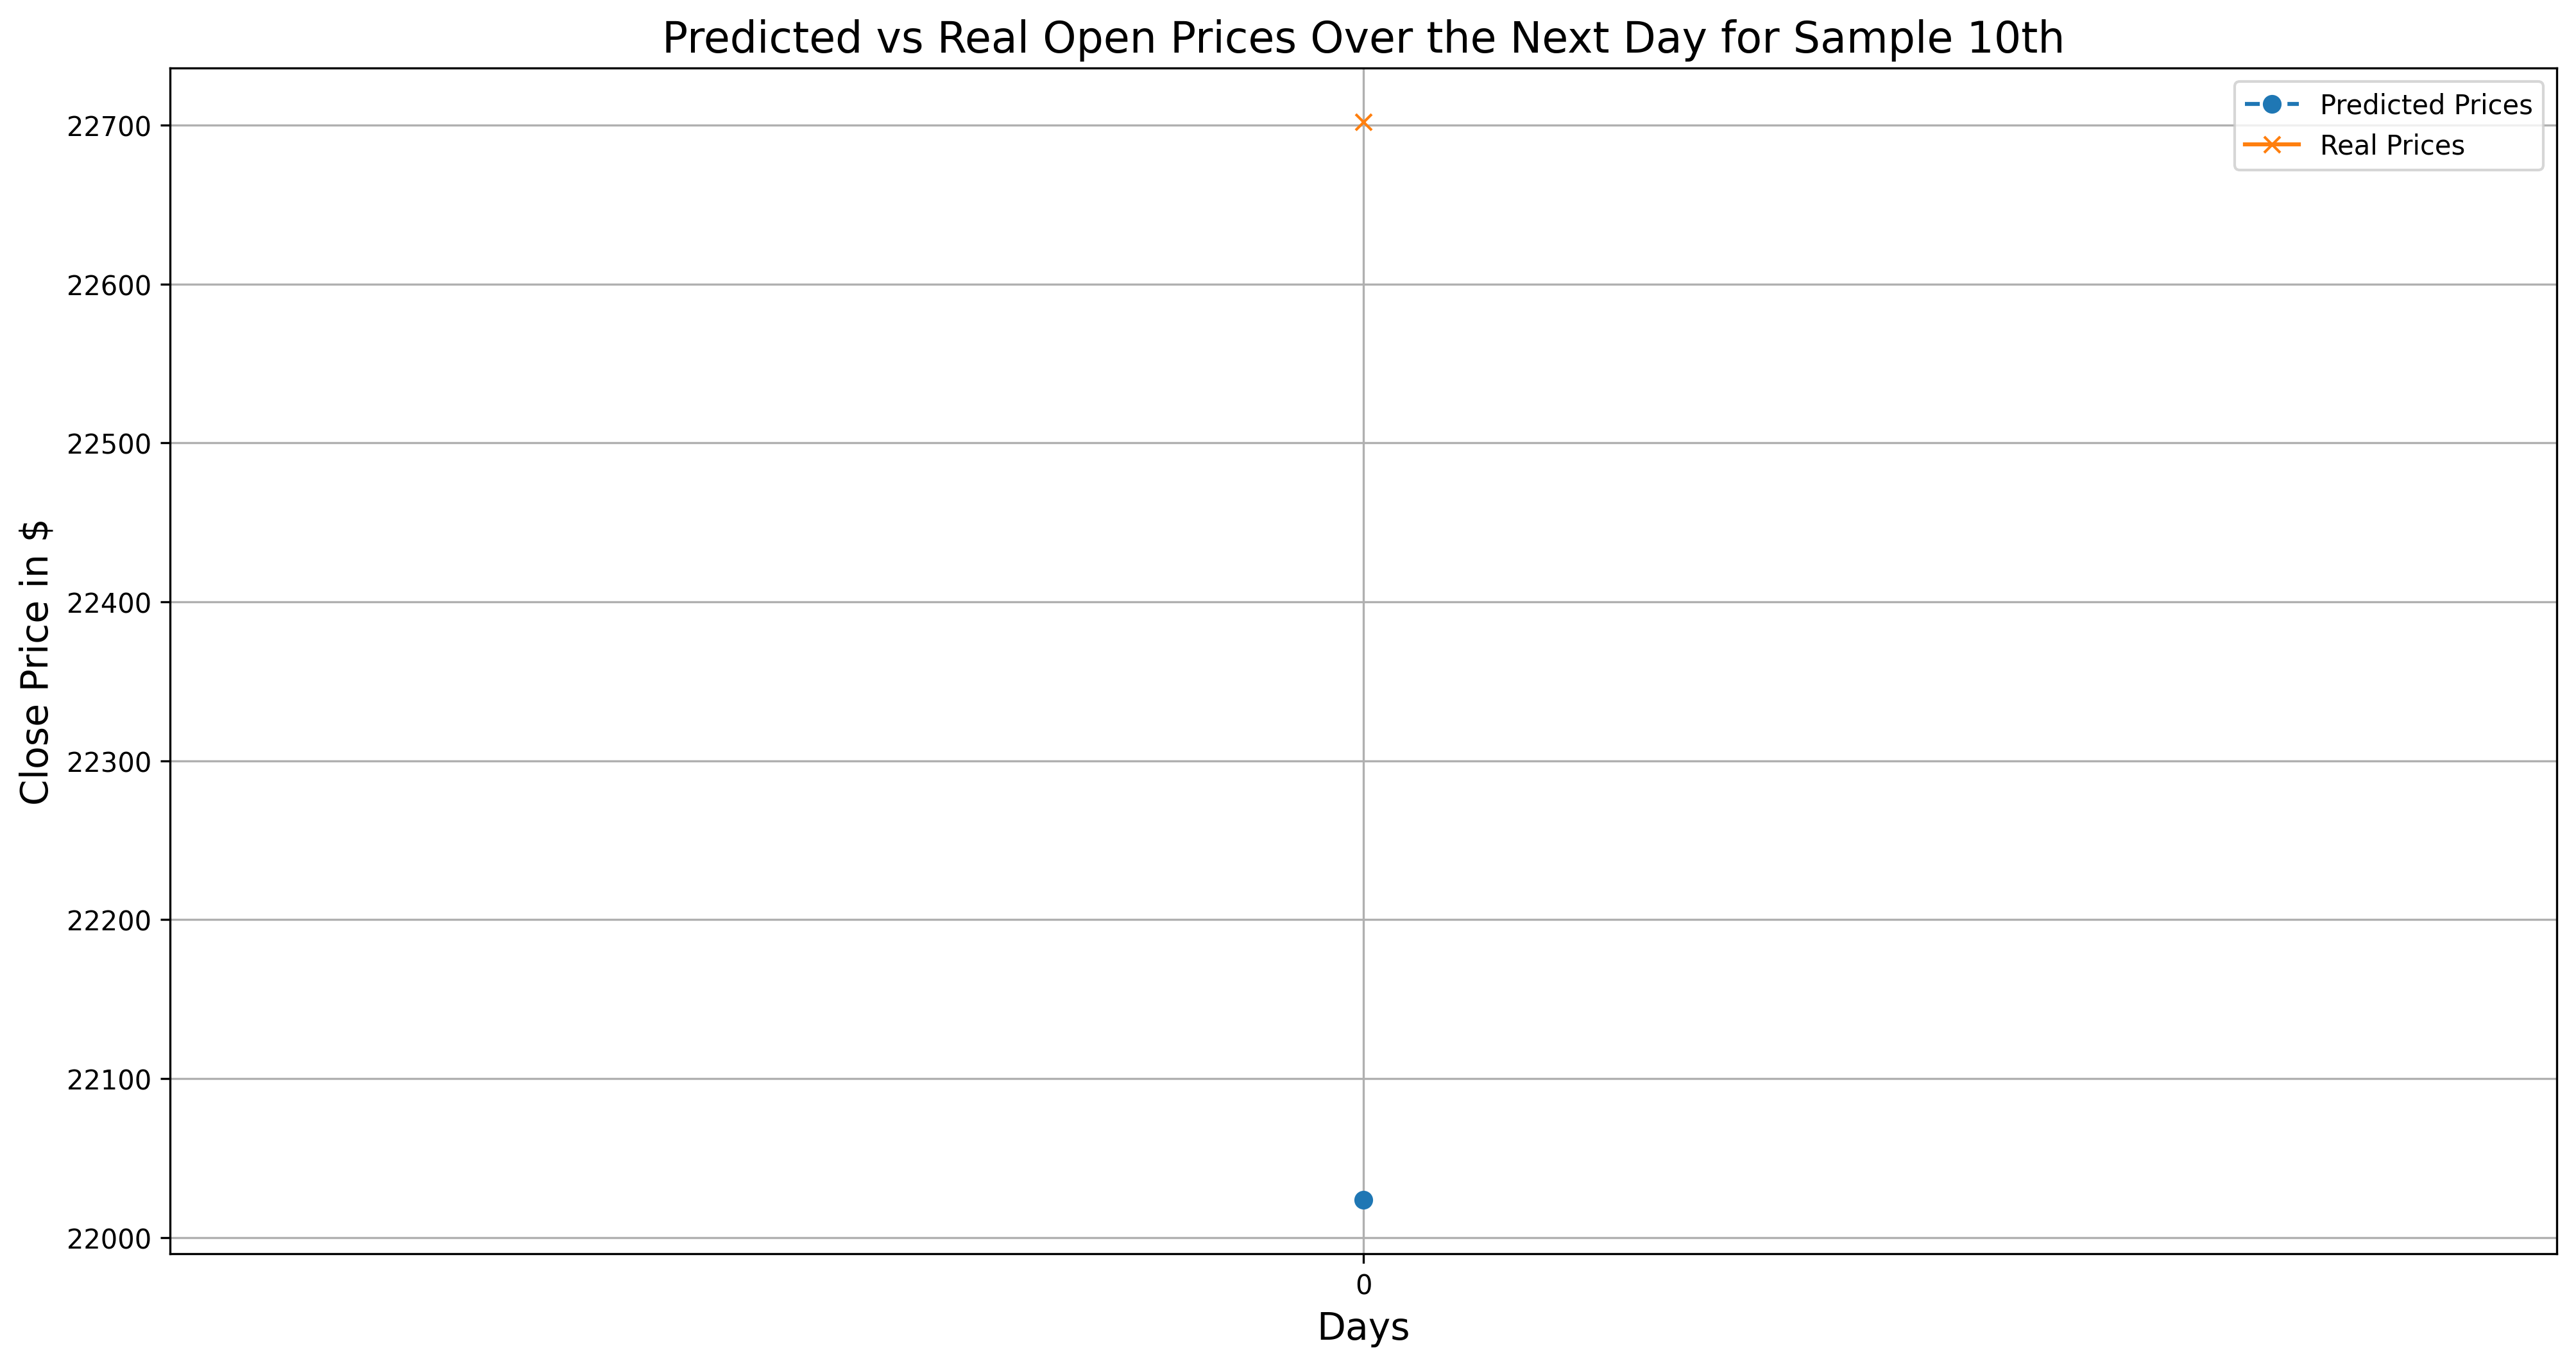

In [ ]:
plot_prediction(y_pred_denom_gru_ts, y_test, "GRU")
plot_prediction_timestep(y_pred_denom_gru_ts, y_test, "GRU")

In [ ]:
stop here if only want to train with time series split

# normal train

In [ ]:
splited_sets = pp.split_data(X_data, y_data)
X_train = splited_sets[0]
X_val = splited_sets[1]
X_test = splited_sets[2]

y_train = splited_sets[3]
y_val = splited_sets[4]
y_test = splited_sets[5]

In [ ]:
y_train.shape

(2659, 1)

In [ ]:
y_train

array([[ 6973.],
       [ 7242.],
       [ 7142.],
       ...,
       [32161.],
       [32161.],
       [31735.]])

In [ ]:
# Reshape the numpy array to fit the neural network input shape requirement
X_train = X_train.reshape(X_train.shape[0], window_size, num_features)
X_val = X_val.reshape(X_val.shape[0], window_size, num_features)
X_test = X_test.reshape(X_test.shape[0], window_size, num_features)

# Print shape of the training, validation and test set
print("Shape of training set: ", X_train.shape)
print("Shape of validation set: ", X_val.shape)
print("Shape of test set: ", X_test.shape)
print()
print("Shape of training set: ", y_train.shape)
print("Shape of validation set: ", y_val.shape)
print("Shape of test set: ", y_test.shape)

Shape of training set:  (2659, 30, 5)
Shape of validation set:  (665, 30, 5)
Shape of test set:  (831, 30, 5)

Shape of training set:  (2659, 1)
Shape of validation set:  (665, 1)
Shape of test set:  (831, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# in this code i create 6 scaler for 6 feature, and 1 scaler for all the y data. The issue is that I should use param(scaler) by fitting x to
# transform y using that param. But now i have 6 params for x and i just need 1 param for y. so how to handle this.
# Initialize the MinMaxScaler for each feature
#y_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
# Reshape each feature (axis=-1) for scaling
X_train_norm = X_train.copy()
X_val_norm = X_val.copy()
X_test_norm = X_test.copy()

# Loop through each feature (axis=2) and scale across time and samples
for i in range(X_train.shape[2]):
    # Flatten the data for the i-th feature and apply MinMaxScaler
    scaler = MinMaxScaler()
    X_train_norm[:, :, i] = scaler.fit_transform(X_train[:, :, i])
    X_val_norm[:, :, i] = scaler.transform(X_val[:, :, i])
    X_test_norm[:, :, i] = scaler.transform(X_test[:, :, i])

    y_train_norm = y_scaler.fit_transform(y_train)
    y_val_norm = y_scaler.transform(y_val)
    y_test_norm = y_scaler.transform(y_test)


# Check the new shapes (they should remain the same as before)
print("Shape of scaled training set: ", X_train_norm.shape)
print("Shape of scaled validation set: ", X_val_norm.shape)
print("Shape of scaled test set: ", X_test_norm.shape)
print()
print("Shape of scales training label ", y_train_norm.shape)
print("Shape of scales validation label ", y_val_norm.shape)
print("Shape of scales test label ", y_test_norm.shape)

Shape of scaled training set:  (2659, 30, 5)
Shape of scaled validation set:  (665, 30, 5)
Shape of scaled test set:  (831, 30, 5)

Shape of scales training label  (2659, 1)
Shape of scales validation label  (665, 1)
Shape of scales test label  (831, 1)


## train

In [ ]:
# Compile and train GRU
optimizer = Nadam(learning_rate=0.01)
compile(model_gru, optimizer)
callbacks = get_callbacks(file_path='model_gru.keras')
history_gru = train_history(model_gru, batch_size=2048, epochs=40, callbacks=callbacks,
                               X_train_norm=X_train_norm, y_train_norm=y_train_norm,
                               validation_data=(X_val_norm, y_val_norm))

Epoch 1/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 0.1584 - mae: 0.3605 - val_loss: 0.9661 - val_mae: 0.9602 - learning_rate: 0.0100
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 497ms/step - loss: 0.2268 - mae: 0.4290 - val_loss: 0.0404 - val_mae: 0.1823 - learning_rate: 0.0100
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 851ms/step - loss: 0.0059 - mae: 0.0604 - val_loss: 0.0559 - val_mae: 0.2213 - learning_rate: 0.0100
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 529ms/step - loss: 0.0077 - mae: 0.0708 - val_loss: 0.0797 - val_mae: 0.2693 - learning_rate: 0.0100
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 503ms/step - loss: 0.0119 - mae: 0.0884 - val_loss: 0.0398 - val_mae: 0.1878 - learning_rate: 0.0100
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 519ms/step - loss: 0.0059 - mae: 0.0606 - val_loss: 0.0263 - val_mae: 0.1521 - learning_rate: 0.0100
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 514ms/step - loss: 0.0043 - mae: 0.0513 - val_loss: 0.0238 - val_mae: 0.1458 - learning_rate: 0.0100
Epoch 8/40
2/2 ━━━━━━━━

In [ ]:
# Compile and train LSTM
optimizer = Nadam(learning_rate=0.01)
compile(model_lstm, optimizer)
callbacks = get_callbacks(file_path='model_lstm.keras')
history_lstm = train_history(model_lstm, batch_size=2048, epochs=40, callbacks=callbacks,
                               X_train_norm=X_train_norm, y_train_norm=y_train_norm,
                               validation_data=(X_val_norm, y_val_norm))

Epoch 1/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 949ms/step - loss: 0.2405 - mae: 0.4038 - val_loss: 1.1174 - val_mae: 1.0314 - learning_rate: 0.0100
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 521ms/step - loss: 0.2495 - mae: 0.4403 - val_loss: 0.0712 - val_mae: 0.2410 - learning_rate: 0.0100
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 840ms/step - loss: 0.0100 - mae: 0.0770 - val_loss: 0.2050 - val_mae: 0.4325 - learning_rate: 0.0100
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 877ms/step - loss: 0.0299 - mae: 0.1367 - val_loss: 0.0171 - val_mae: 0.0998 - learning_rate: 0.0100
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 526ms/step - loss: 0.0063 - mae: 0.0665 - val_loss: 0.0158 - val_mae: 0.0981 - learning_rate: 0.0100
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 525ms/step - loss: 0.0050 - mae: 0.0580 - val_loss: 0.0096 - val_mae: 0.0734 - learning_rate: 0.0100
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 565ms/step - loss: 0.0041 - mae: 0.0531 - val_loss: 0.0068 - val_mae: 0.0614 - learning_rate: 0.0100
Epoch 8/40
2/2 ━━━━━

In [ ]:
# Compile and train BiLSTM
optimizer = Nadam(learning_rate=0.01)
compile(model_bilstm, optimizer)
callbacks = get_callbacks(file_path='model_bilstm.keras')
history_bilstm = train_history(model_bilstm, batch_size=2048, epochs=40, callbacks=callbacks,
                               X_train_norm=X_train_norm, y_train_norm=y_train_norm,
                               validation_data=(X_val_norm, y_val_norm))

Epoch 1/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - loss: 0.3992 - mae: 0.4770 - val_loss: 1.1135 - val_mae: 1.0318 - learning_rate: 0.0100
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - loss: 0.2705 - mae: 0.4713 - val_loss: 0.3316 - val_mae: 0.5552 - learning_rate: 0.0100
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 855ms/step - loss: 0.0559 - mae: 0.1945 - val_loss: 0.0117 - val_mae: 0.0957 - learning_rate: 0.0100
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 778ms/step - loss: 0.0290 - mae: 0.1542 - val_loss: 0.0843 - val_mae: 0.2675 - learning_rate: 0.0100
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 851ms/step - loss: 0.0109 - mae: 0.0802 - val_loss: 0.0295 - val_mae: 0.1431 - learning_rate: 0.0100
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - loss: 0.0073 - mae: 0.0694 - val_loss: 0.0254 - val_mae: 0.1320 - learning_rate: 0.0100
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 809ms/step - loss: 0.0065 - mae: 0.0653 - val_loss: 0.0254 - val_mae: 0.1338 - learning_rate: 0.0050
Epoch 8/40
2/2 ━━━━━━━━━━━━━━

In [ ]:
# Compile and train BiLSTM
optimizer = Nadam(learning_rate=0.01)
compile(model_bigru, optimizer)
callbacks = get_callbacks(file_path='model_bigru.keras')
history_bigru = train_history(model_bigru, batch_size=2048, epochs=40, callbacks=callbacks,
                               X_train_norm=X_train_norm, y_train_norm=y_train_norm,
                               validation_data=(X_val_norm, y_val_norm))

Epoch 1/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - loss: 0.2670 - mae: 0.4517 - val_loss: 1.7112 - val_mae: 1.2828 - learning_rate: 0.0100
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 851ms/step - loss: 0.4748 - mae: 0.6334 - val_loss: 0.3691 - val_mae: 0.5880 - learning_rate: 0.0100
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - loss: 0.0655 - mae: 0.2144 - val_loss: 0.0043 - val_mae: 0.0531 - learning_rate: 0.0100
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 848ms/step - loss: 0.0137 - mae: 0.1025 - val_loss: 0.0048 - val_mae: 0.0519 - learning_rate: 0.0100
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 927ms/step - loss: 0.0091 - mae: 0.0817 - val_loss: 0.0061 - val_mae: 0.0574 - learning_rate: 0.0100
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 912ms/step - loss: 0.0058 - mae: 0.0638 - val_loss: 0.0074 - val_mae: 0.0642 - learning_rate: 0.0100
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 772ms/step - loss: 0.0037 - mae: 0.0497 - val_loss: 0.0091 - val_mae: 0.0762 - learning_rate: 0.0050
Epoch 8/40
2/2 ━━━━━━━━━━

##plot performance

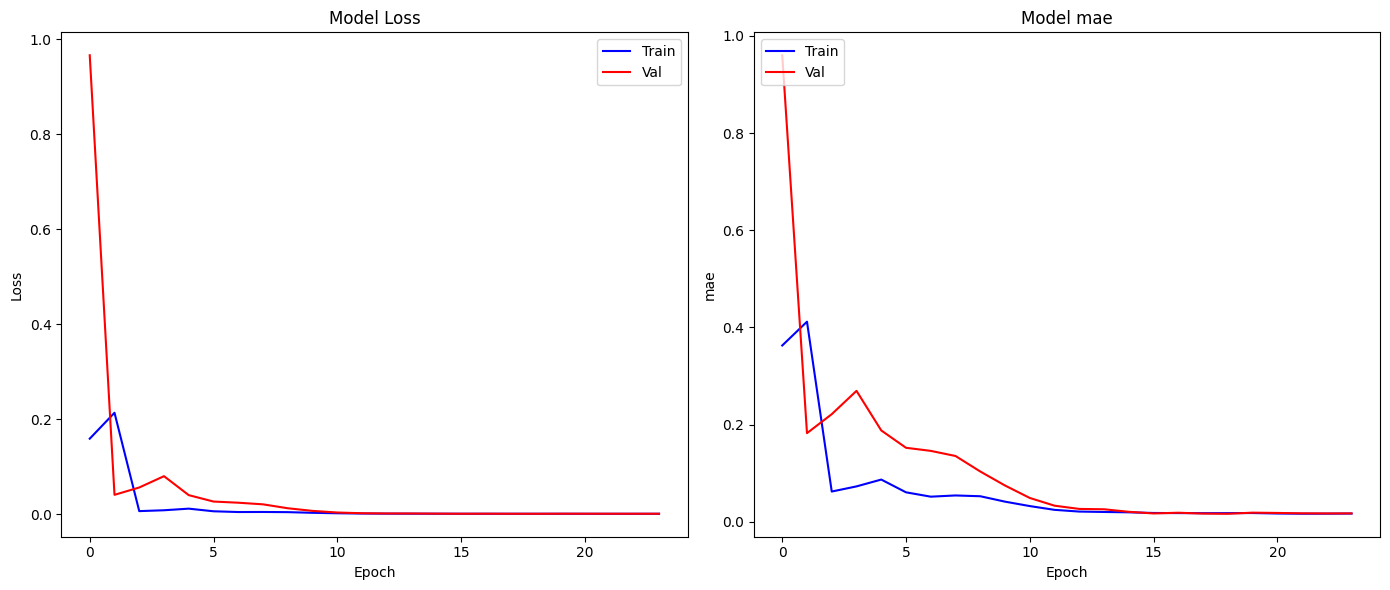

In [ ]:
plot_performance(history_gru)

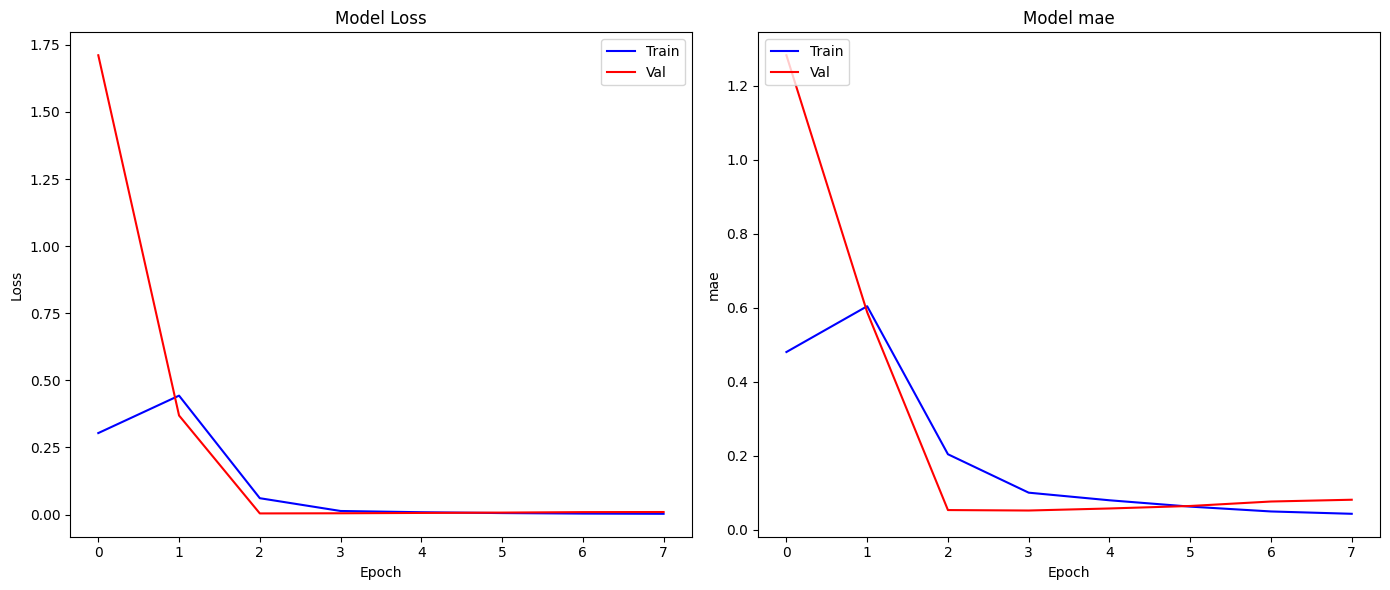

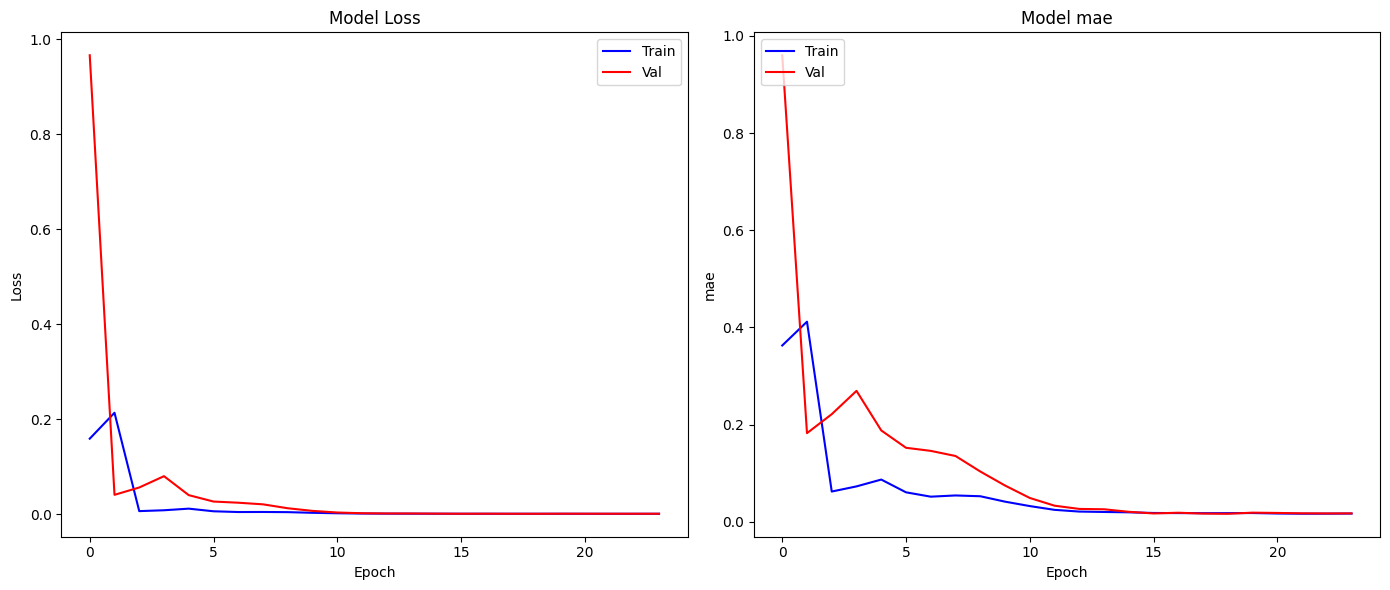

In [ ]:
plot_performance(history_bigru)
plot_performance(history_gru)

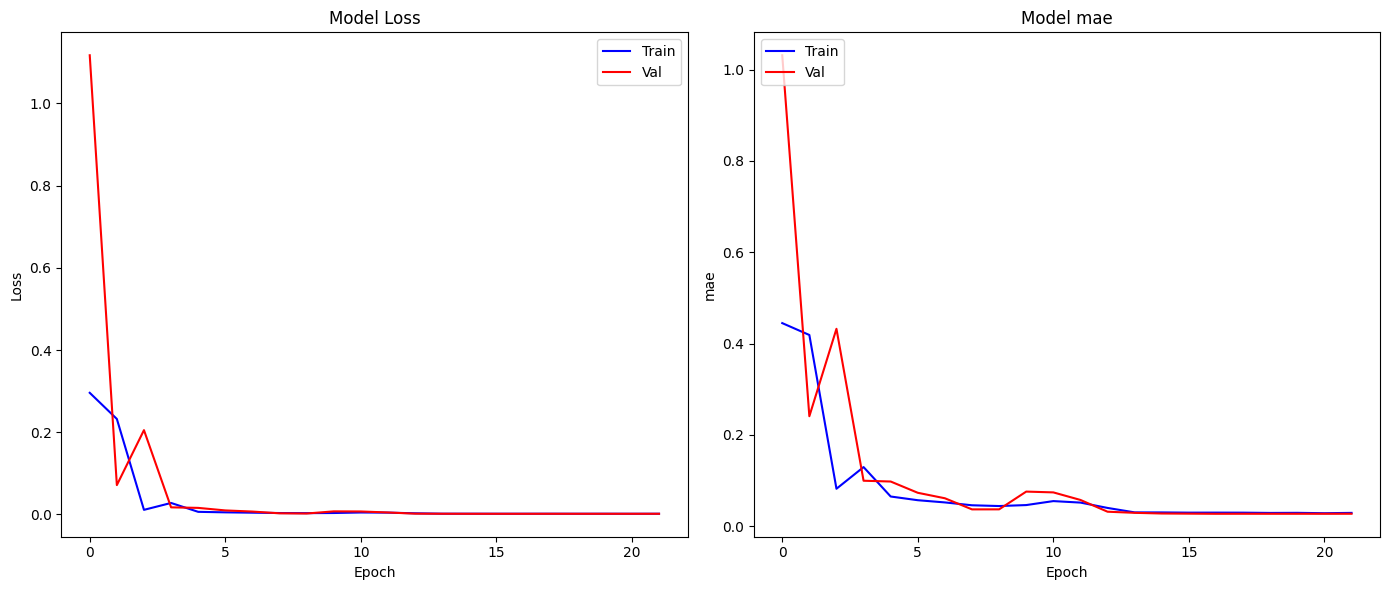

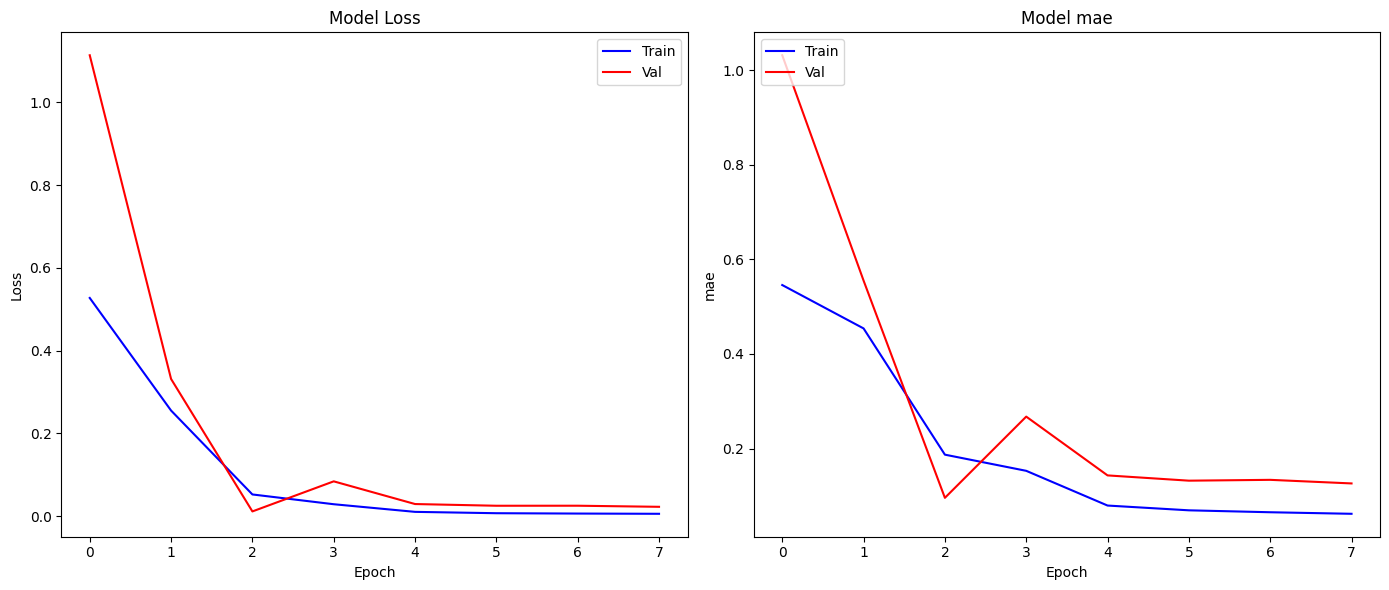

In [ ]:
plot_performance(history_lstm)
plot_performance(history_bilstm)

## Evaluation

In [ ]:
print("=========GRU===========")
model_gru = get_model_n_evaluate("/content/model_gru.keras", X_test_norm, y_test_norm)
y_pred_denorm_gru = get_reverse_prediction(model_gru, X_test_norm, y_scaler)
print()

=========GRU===========
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8.2875e-04 - mae: 0.0174
['loss', 'compile_metrics']
Loss and mae on the test set: loss = 0.0015913700917735696, mae = 0.024530671536922455
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
MSE on the test set:  0.0015913699441138128
Shape of denormalized training set:  (831, 1)



In [ ]:
print("=========BiGRU===========")
model_bigru = get_model_n_evaluate("/content/model_bigru.keras", X_test_norm, y_test_norm)
y_pred_denorm_bigru = get_reverse_prediction(model_bigru, X_test_norm, y_scaler)
print()

=========BiGRU===========
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0095 - mae: 0.0767
['loss', 'compile_metrics']
Loss and mae on the test set: loss = 0.015530340373516083, mae = 0.0943523421883583
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
MSE on the test set:  0.015530340086593682
Shape of denormalized training set:  (831, 1)



In [ ]:
print("=========BiLSTM===========")
model_bilstm = get_model_n_evaluate("/content/model_bilstm.keras", X_test_norm, y_test_norm)
y_pred_denorm_bilstm = get_reverse_prediction(model_bilstm, X_test_norm, y_scaler)
print()

print("=========LSTM===========")
model_lstm = get_model_n_evaluate("/content/model_lstm.keras", X_test_norm, y_test_norm)
y_pred_denorm_lstm = get_reverse_prediction(model_lstm, X_test_norm, y_scaler)

=========BiLSTM===========
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0248 - mae: 0.1419
['loss', 'compile_metrics']
Loss and mae on the test set: loss = 0.029891422018408775, mae = 0.1460263431072235
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
MSE on the test set:  0.02989141972392069
Shape of denormalized training set:  (831, 1)

=========LSTM===========
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0030 - mae: 0.0294
['loss', 'compile_metrics']
Loss and mae on the test set: loss = 0.006170641630887985, mae = 0.0454365611076355
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
MSE on the test set:  0.00617064147442884
Shape of denormalized training set:  (831, 1)


In [ ]:
print(y_test_norm.shape)
print(y_scaler.inverse_transform(y_test_norm).shape)

(831, 1)
(831, 1)


In [ ]:
#convo1d: 0.00047 0.0167
#lstm: 0.00036 0.014

## viz prediction

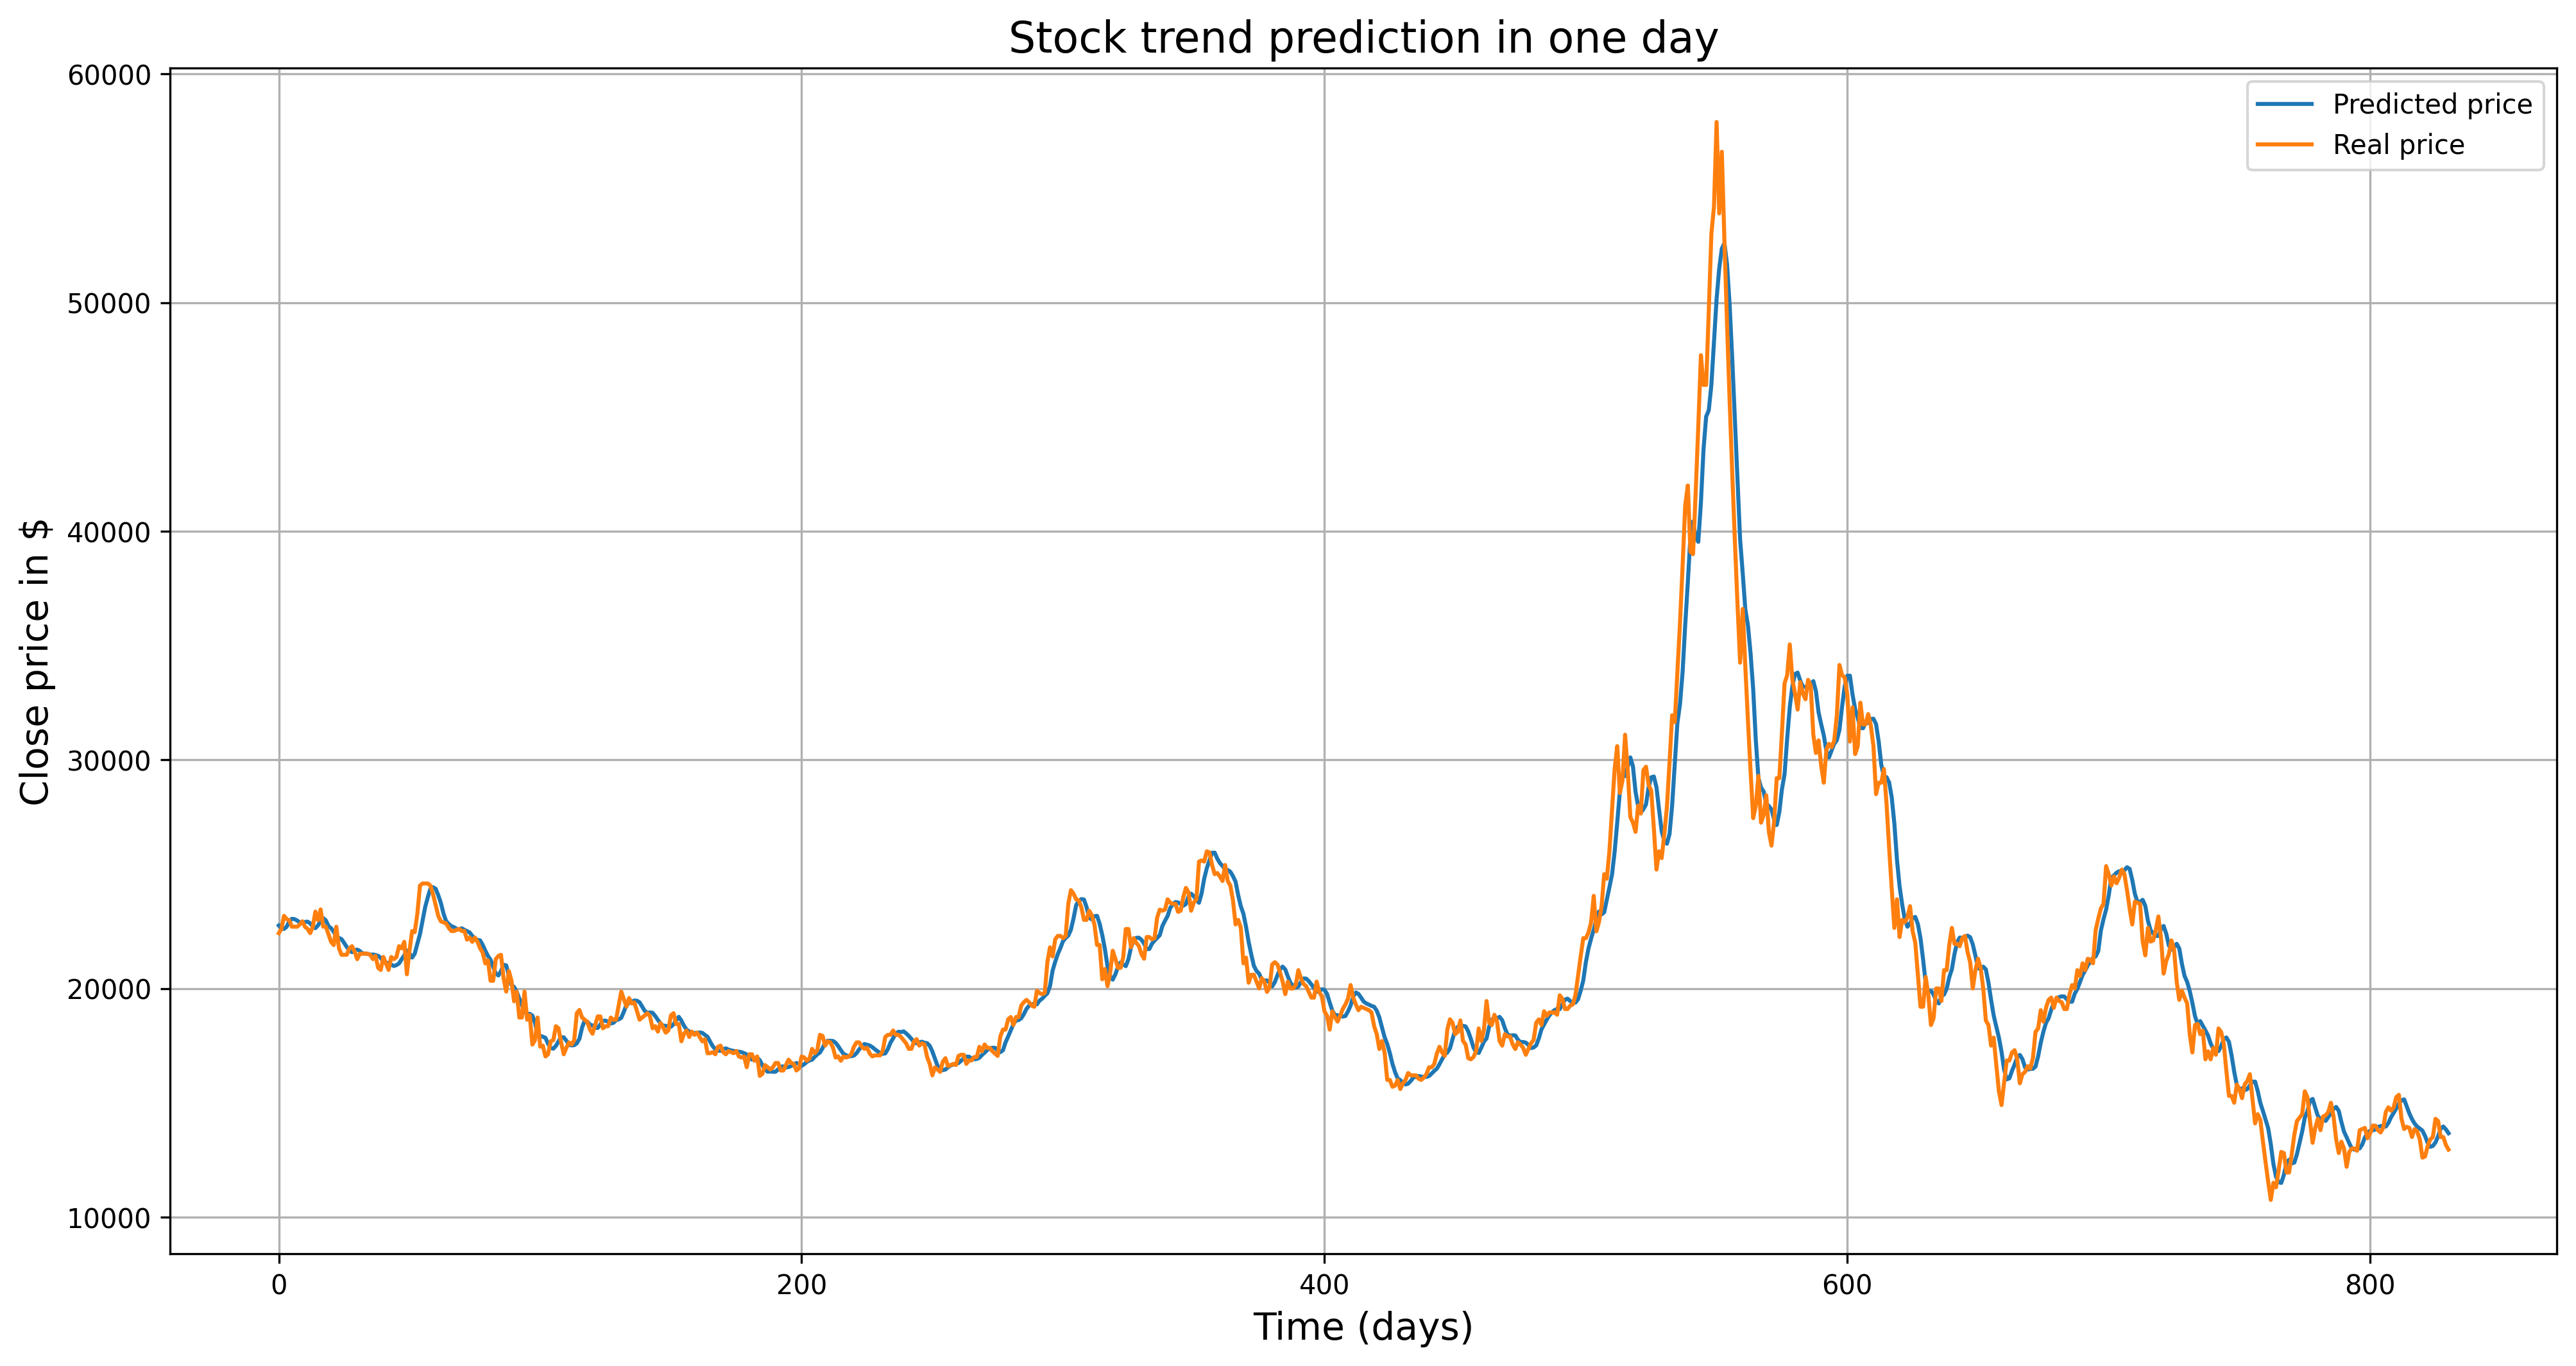

In [ ]:
plot_prediction(y_pred_denorm_gru, y_test, "GRU")

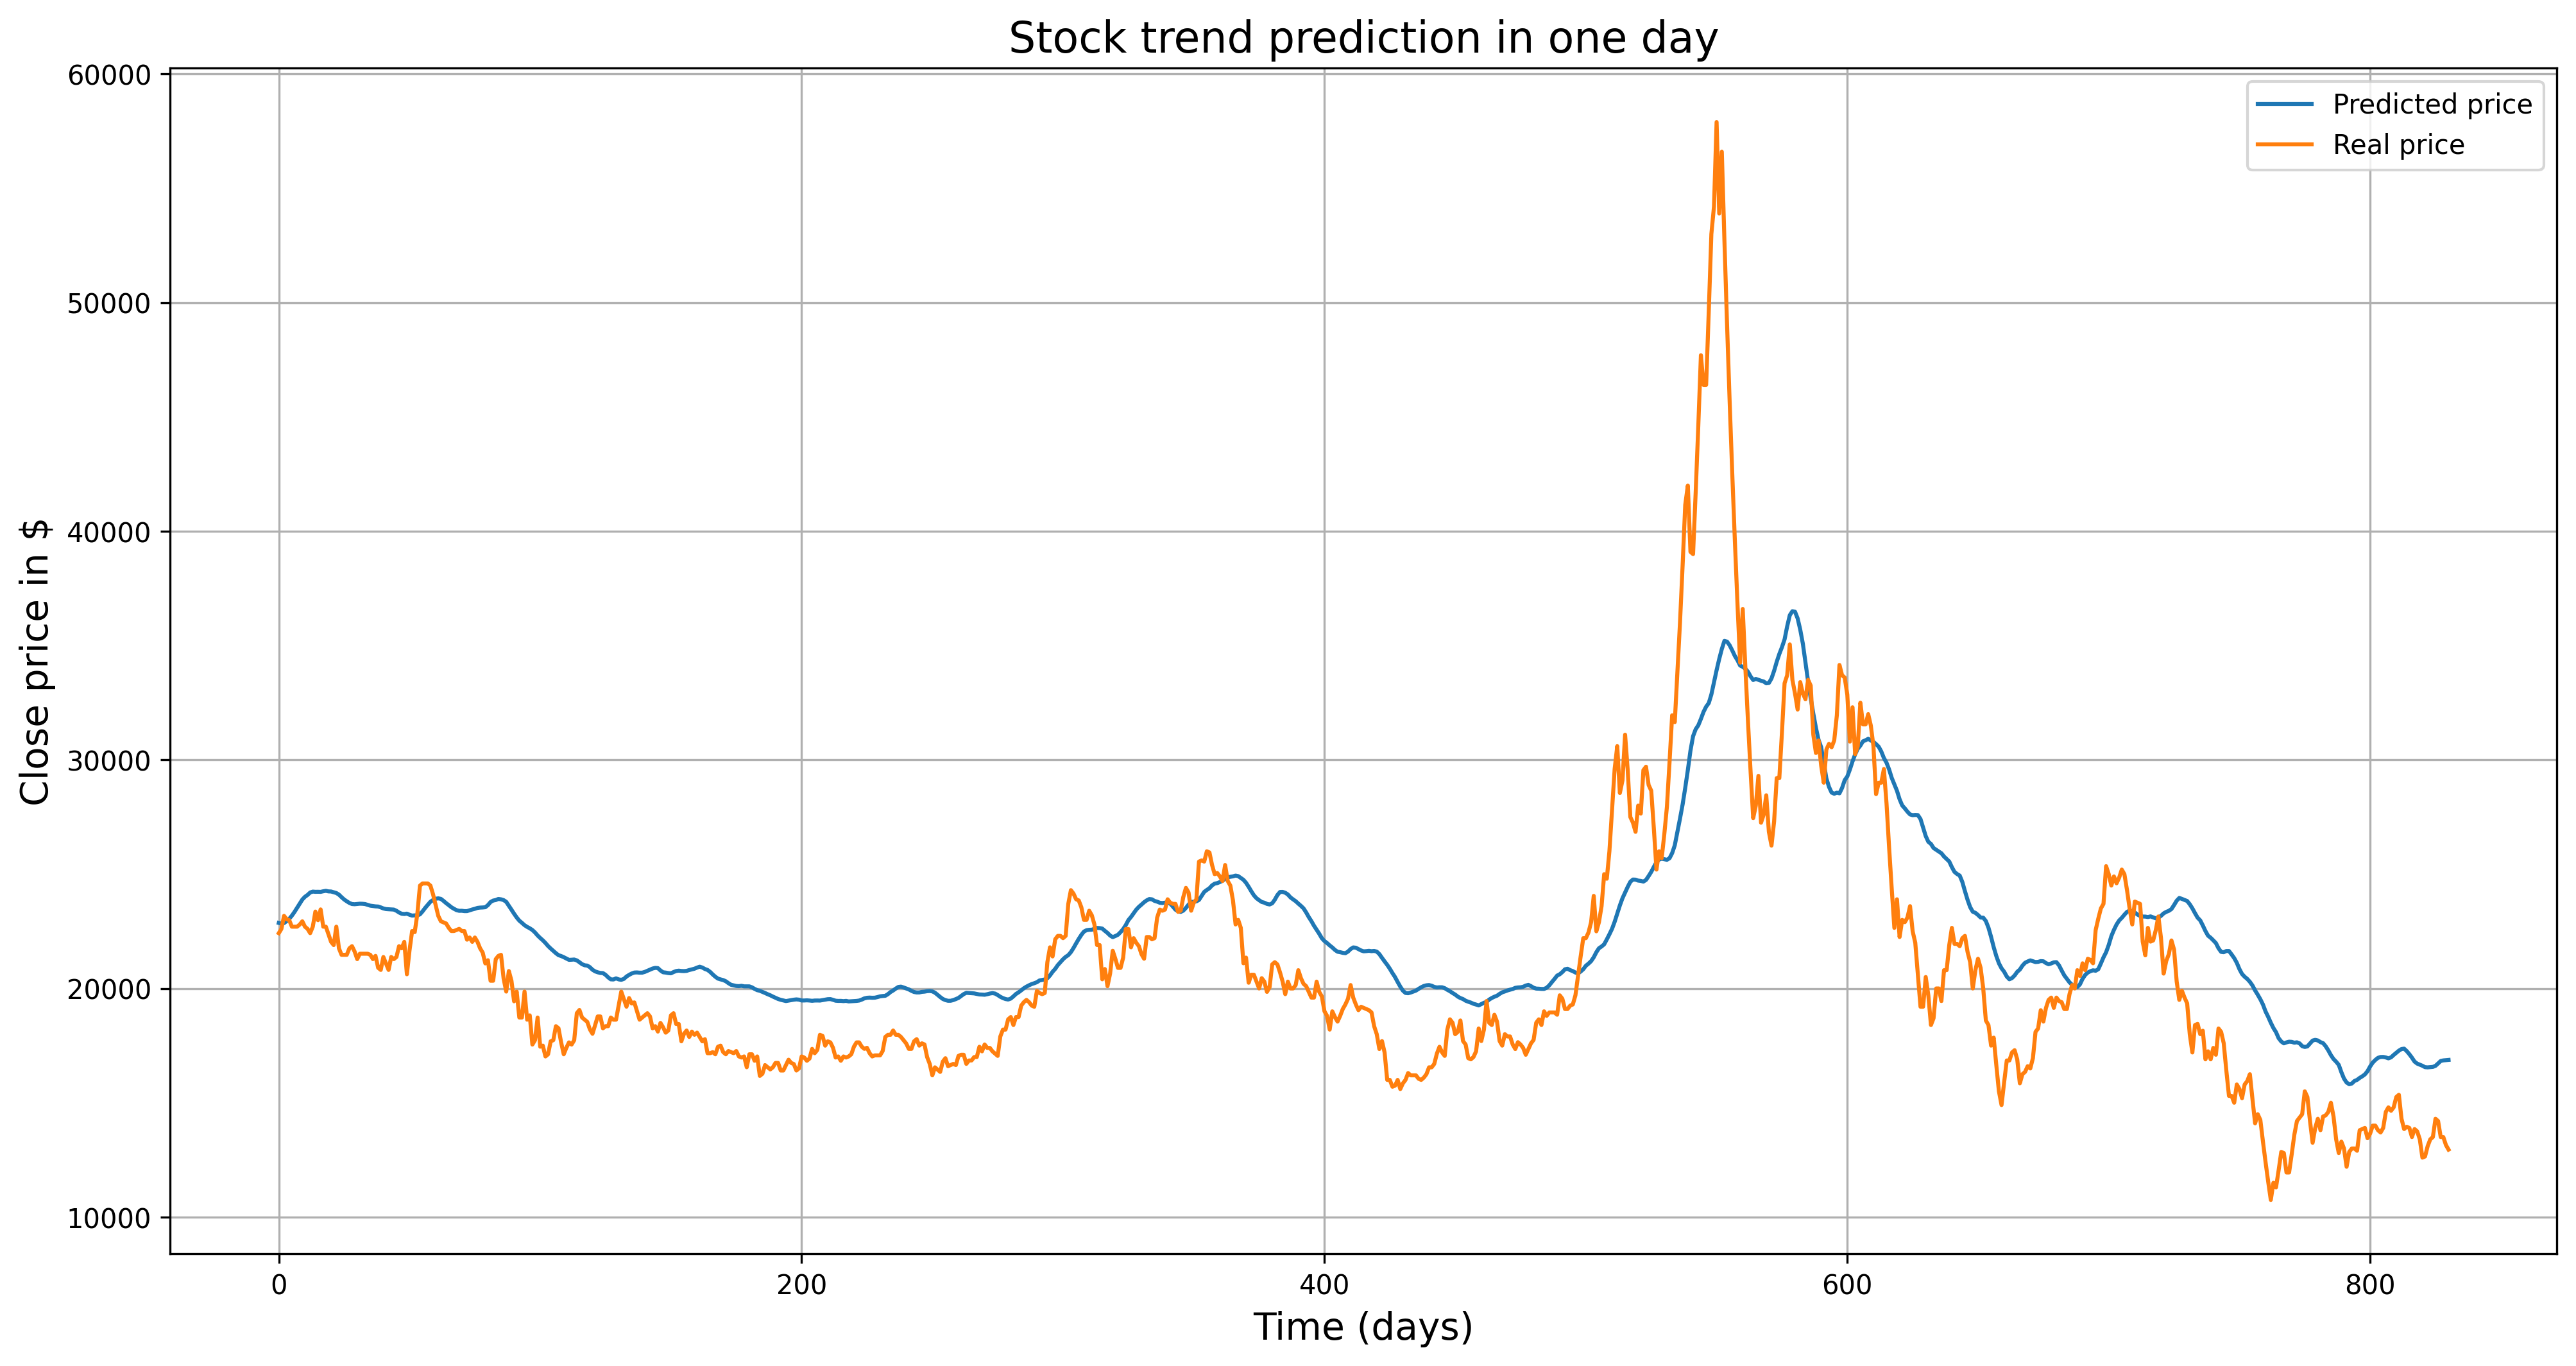

In [ ]:
plot_prediction(y_pred_denorm_bigru, y_test, "BiGRU")

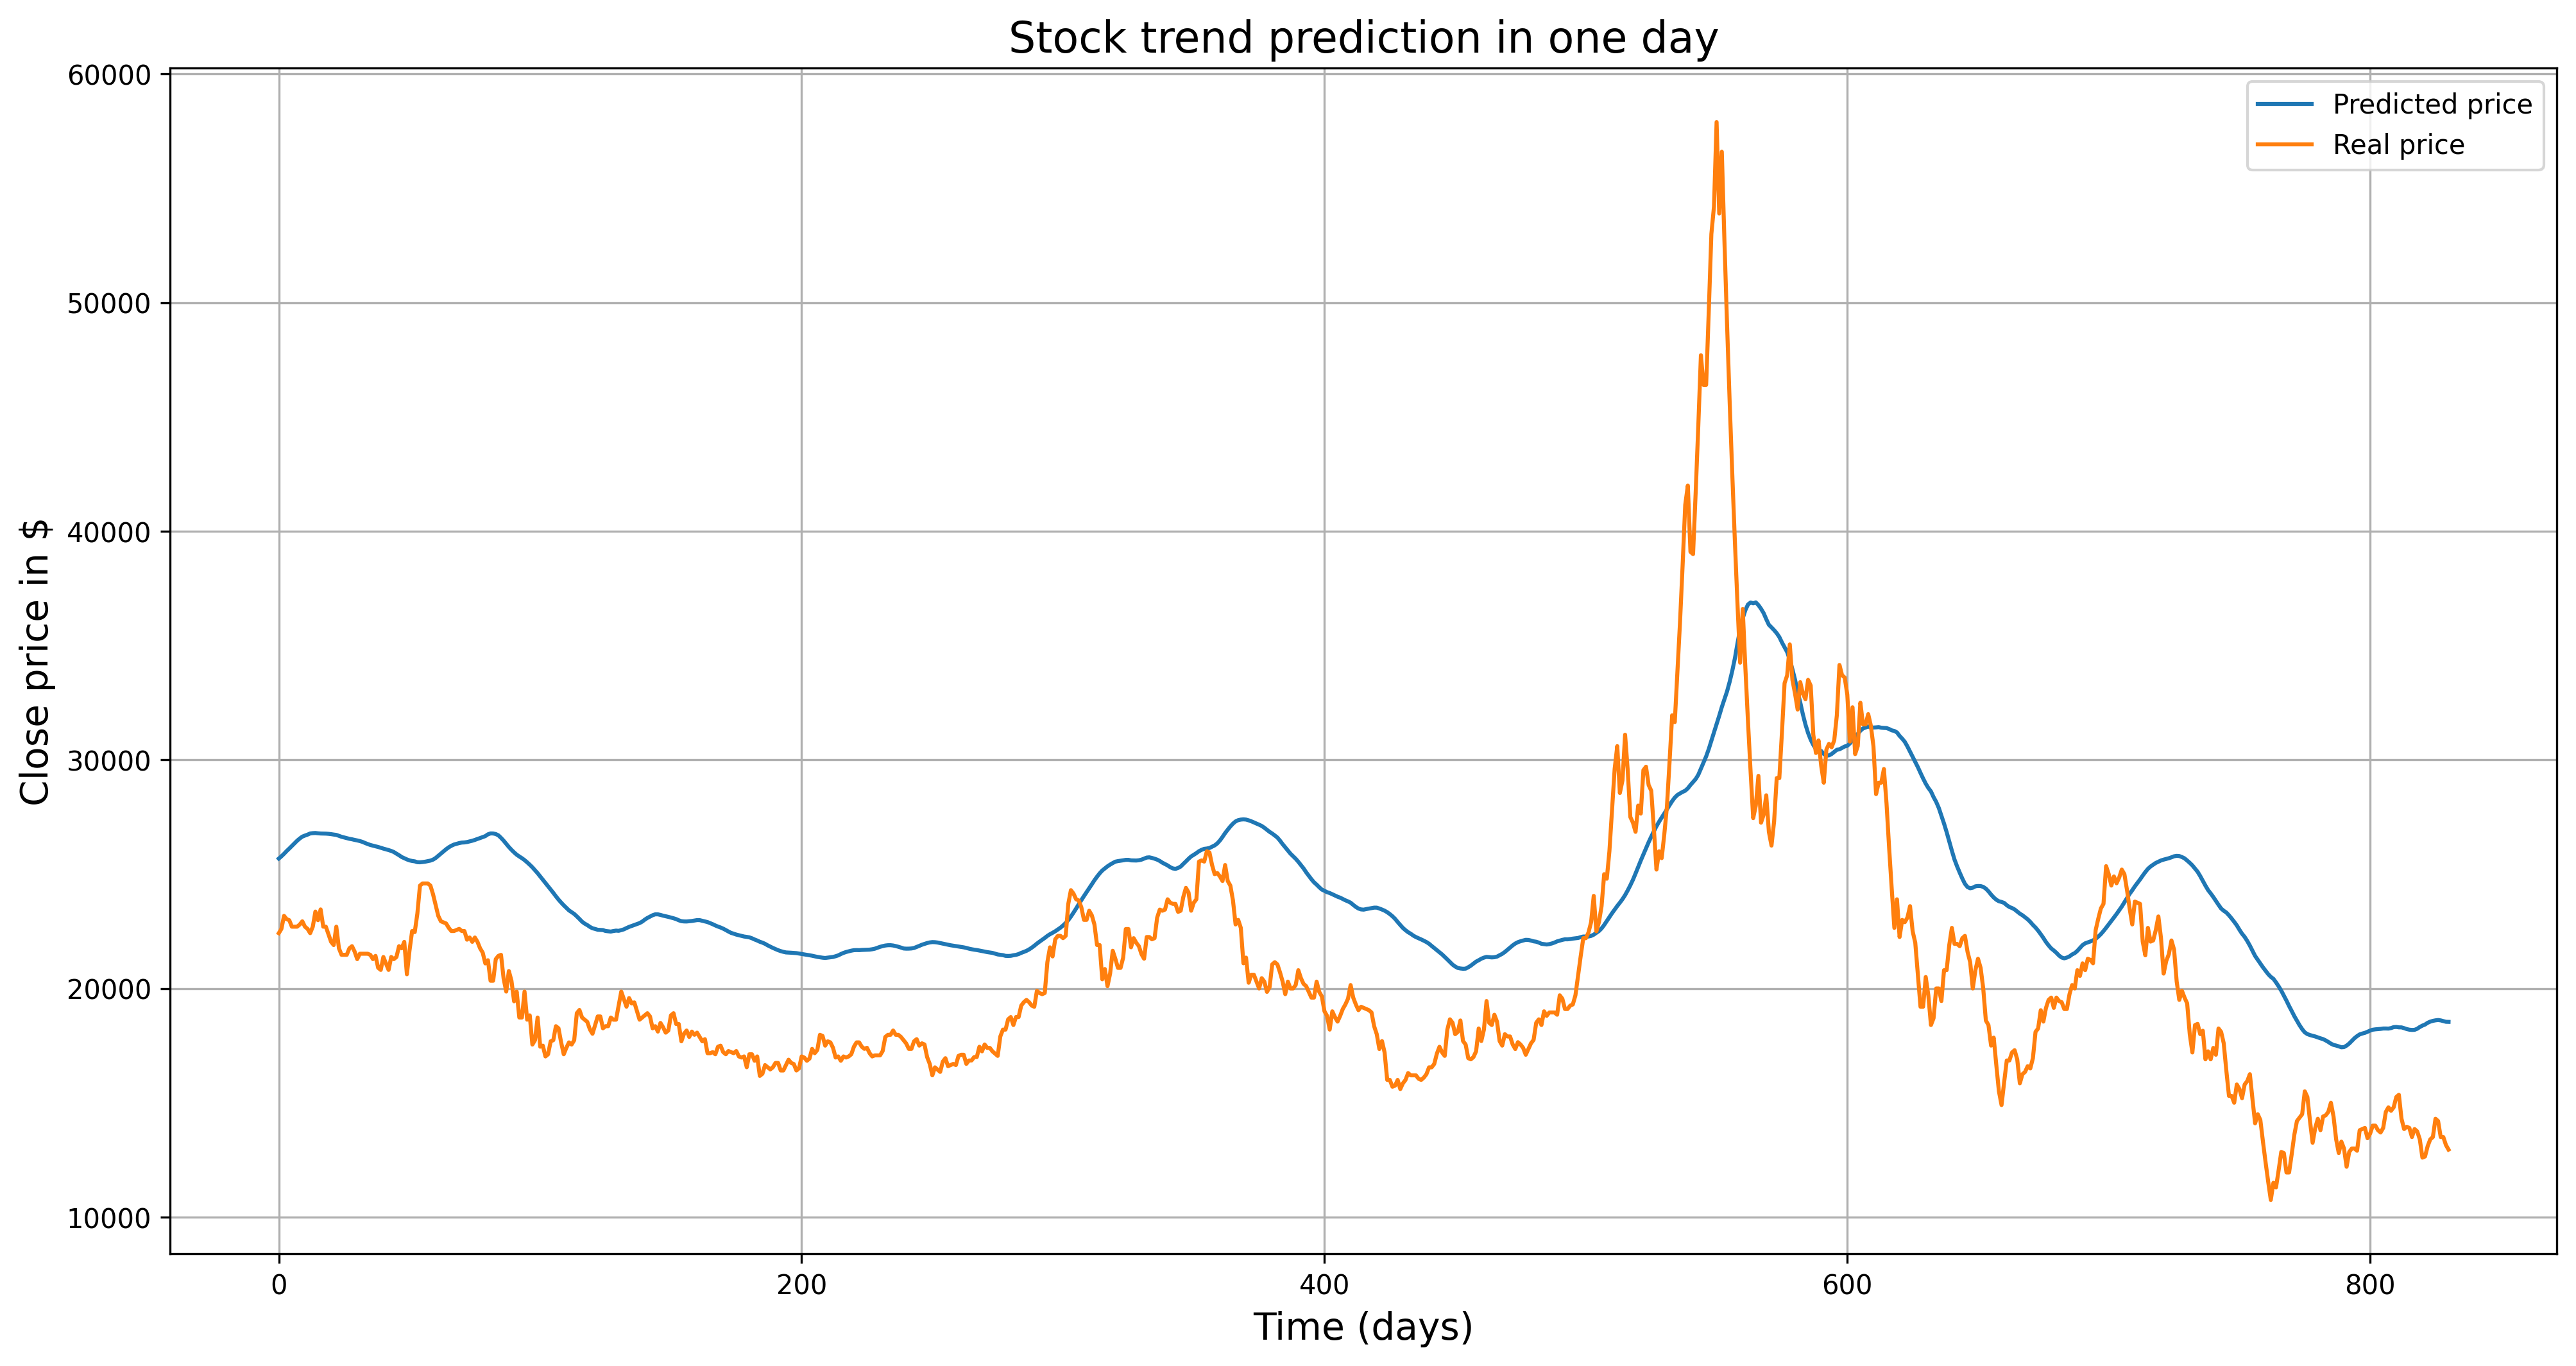

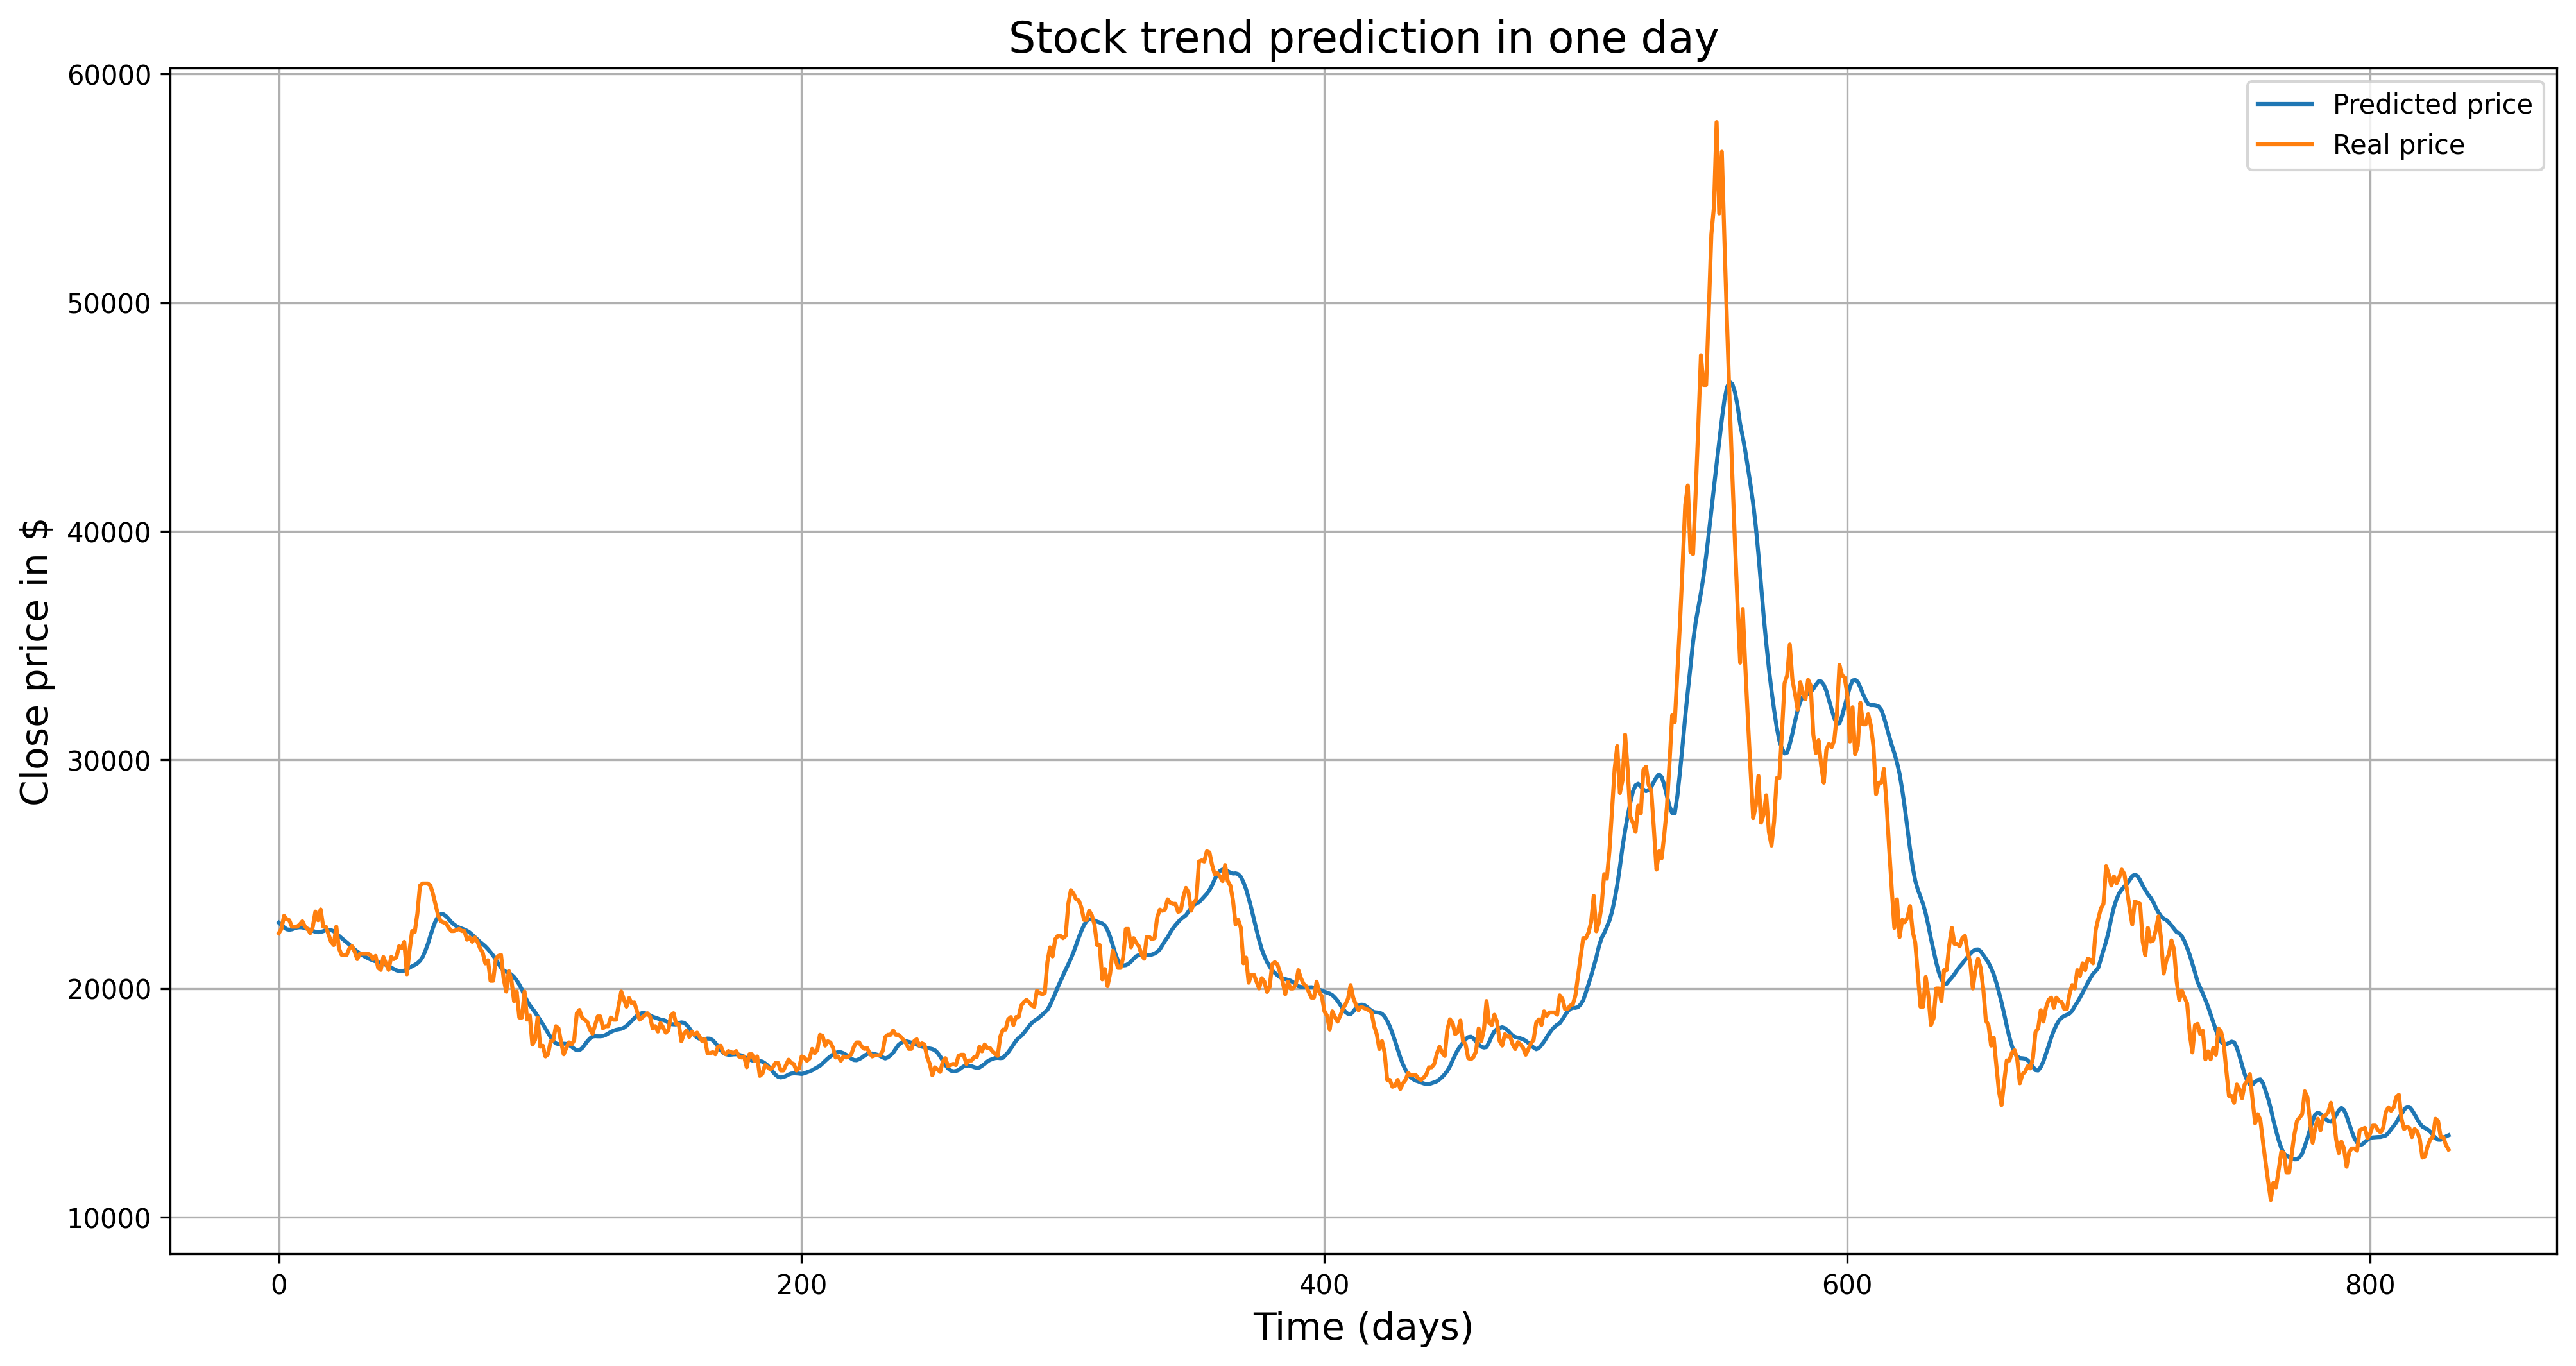

In [ ]:
plot_prediction(y_pred_denorm_bilstm, y_test, "BiLSTM")
plot_prediction(y_pred_denorm_lstm, y_test, "LSTM")

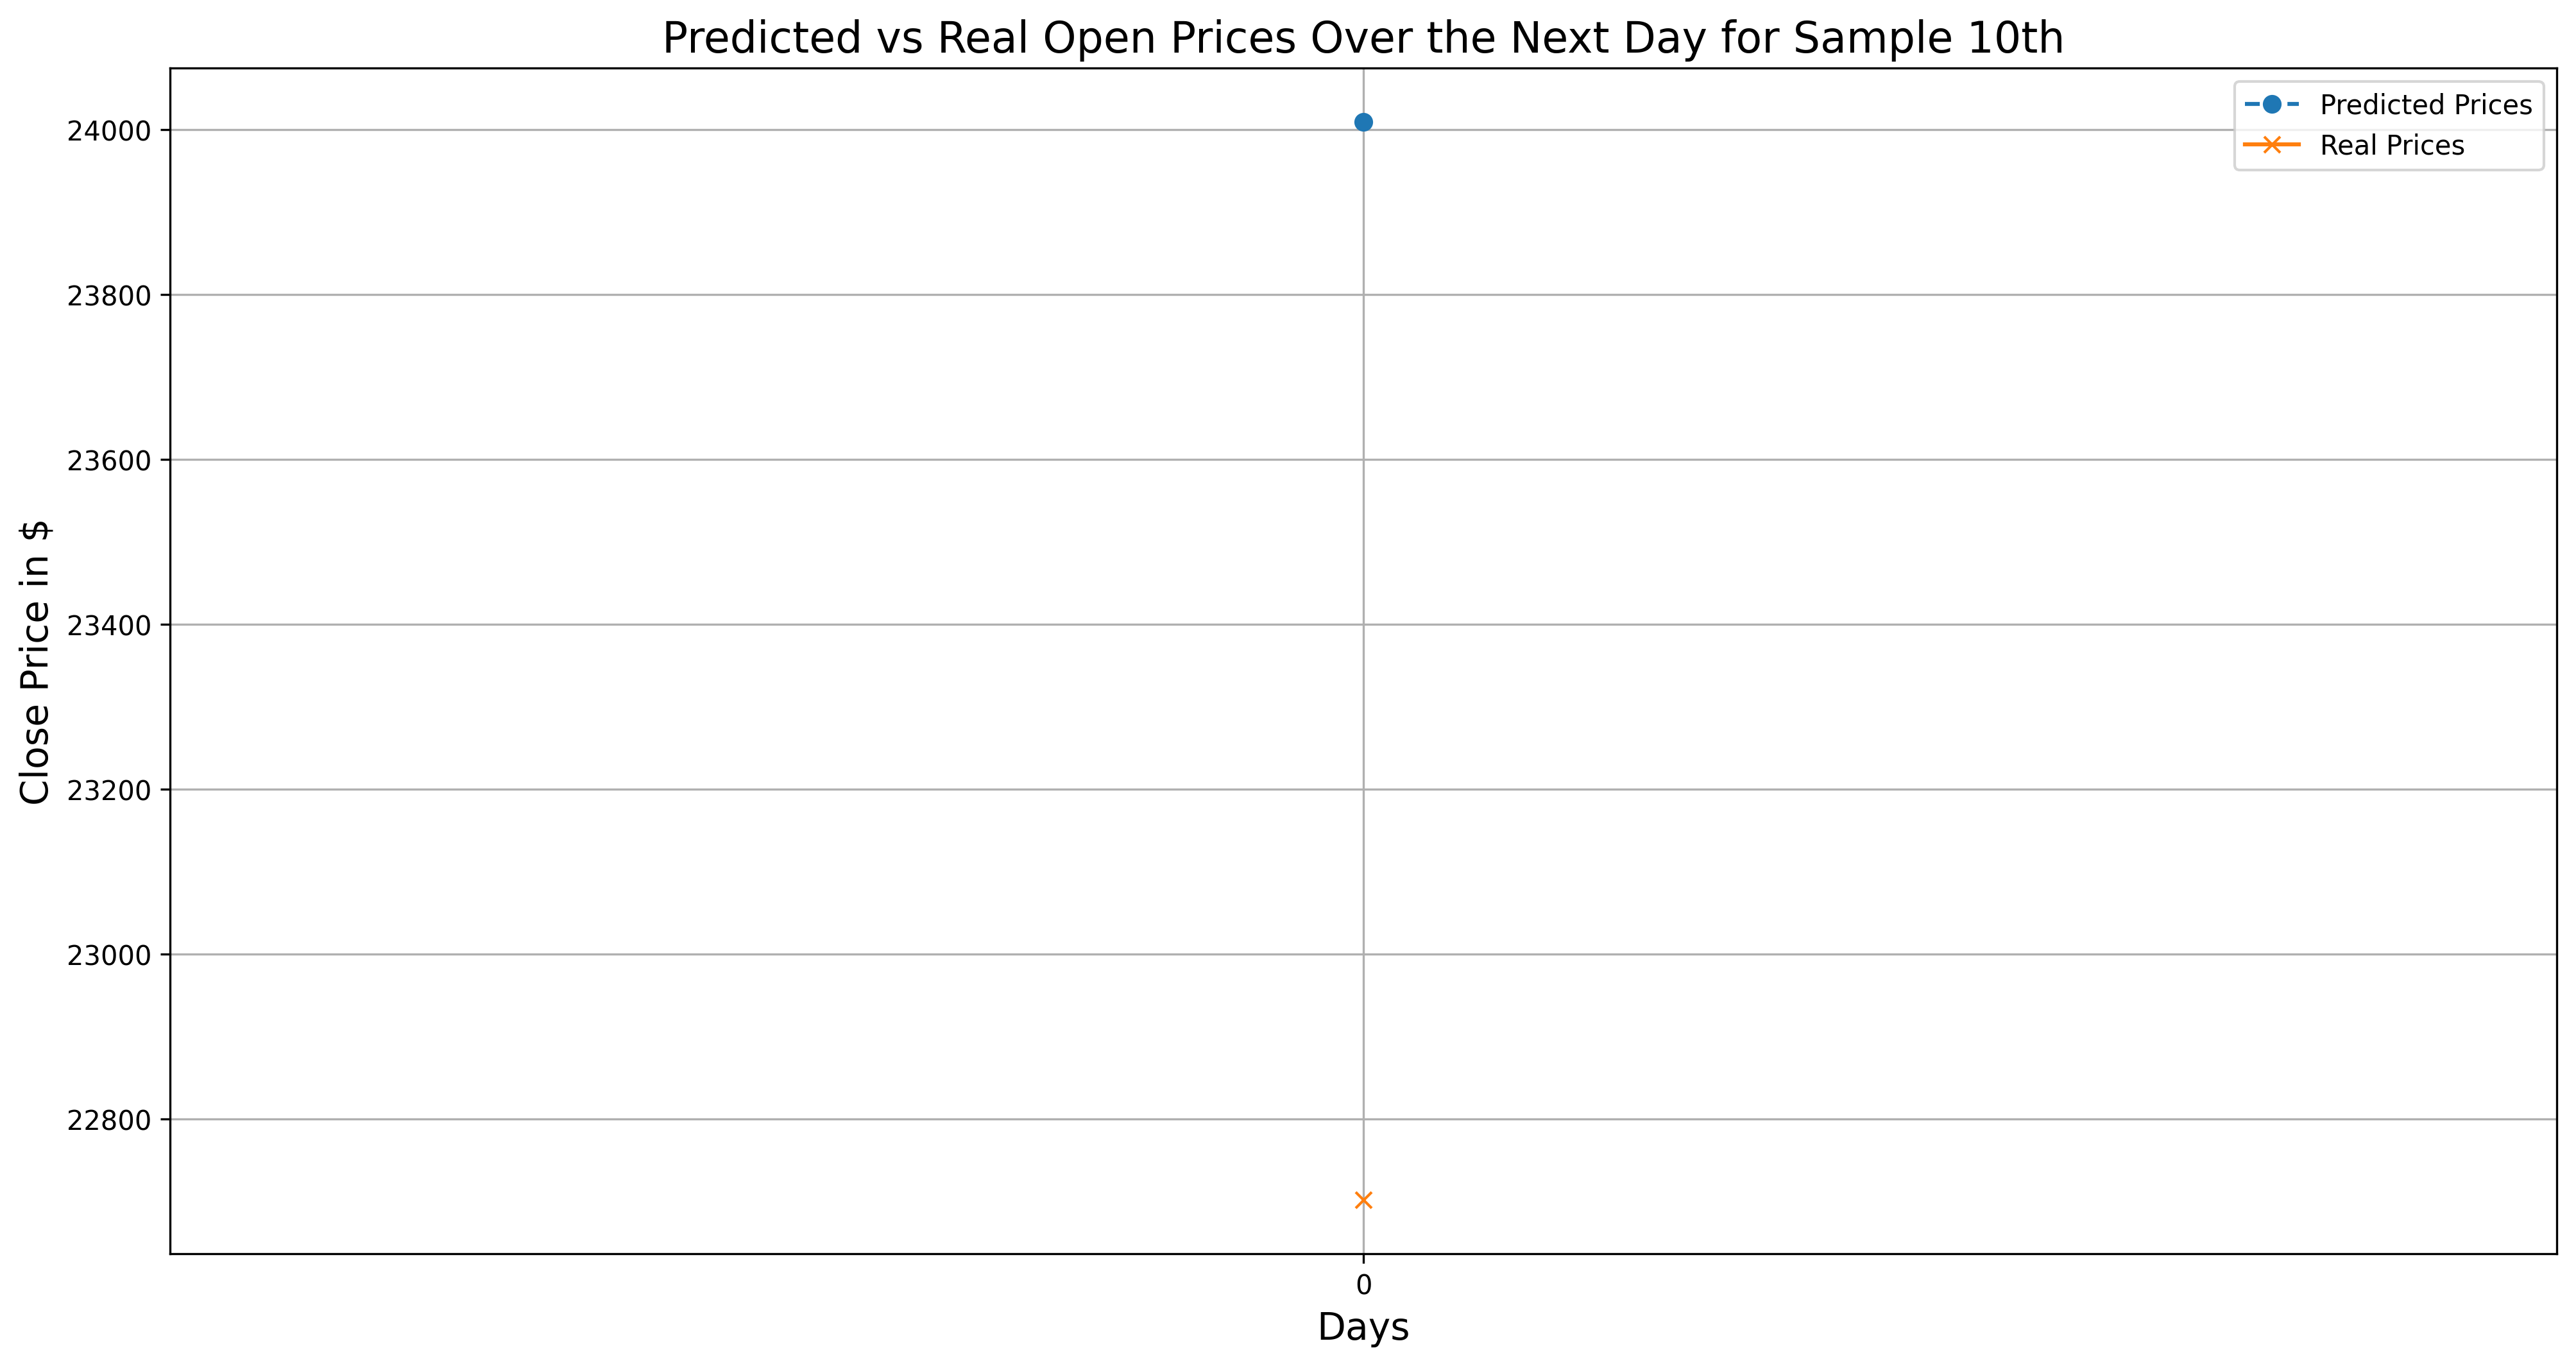

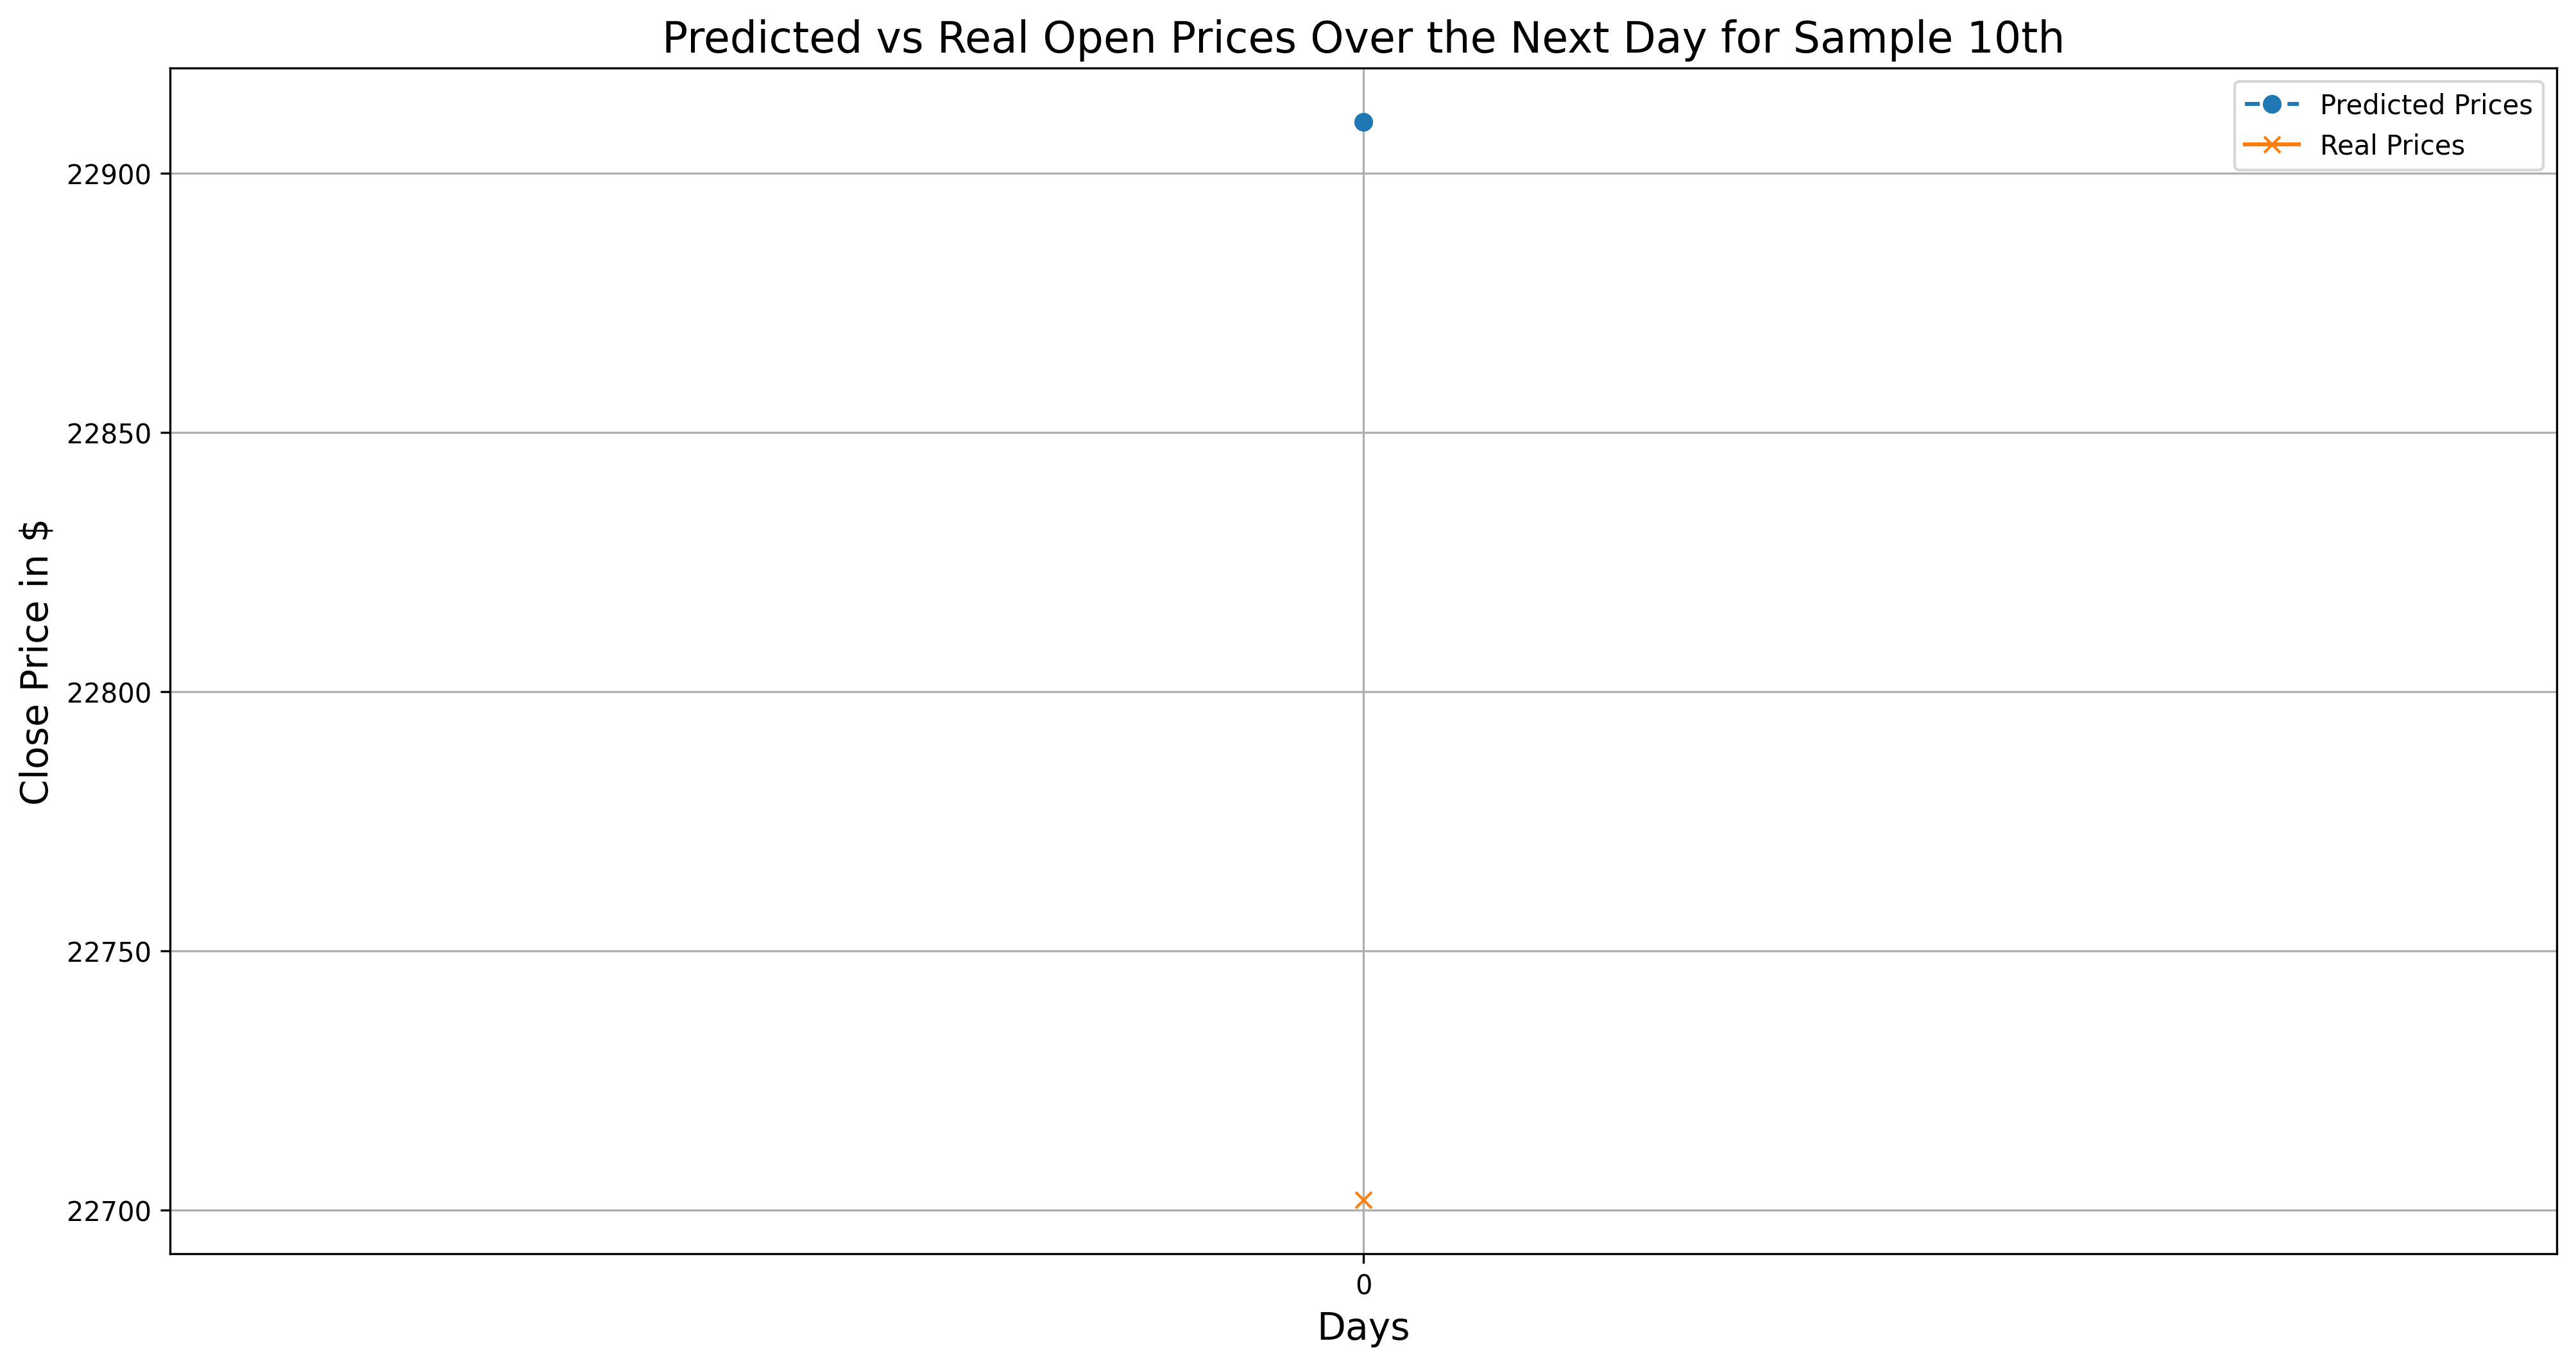

In [ ]:
plot_prediction_timestep(y_pred_denorm_bigru, y_test, "BiGRU")
plot_prediction_timestep(y_pred_denorm_gru, y_test, "GRU")

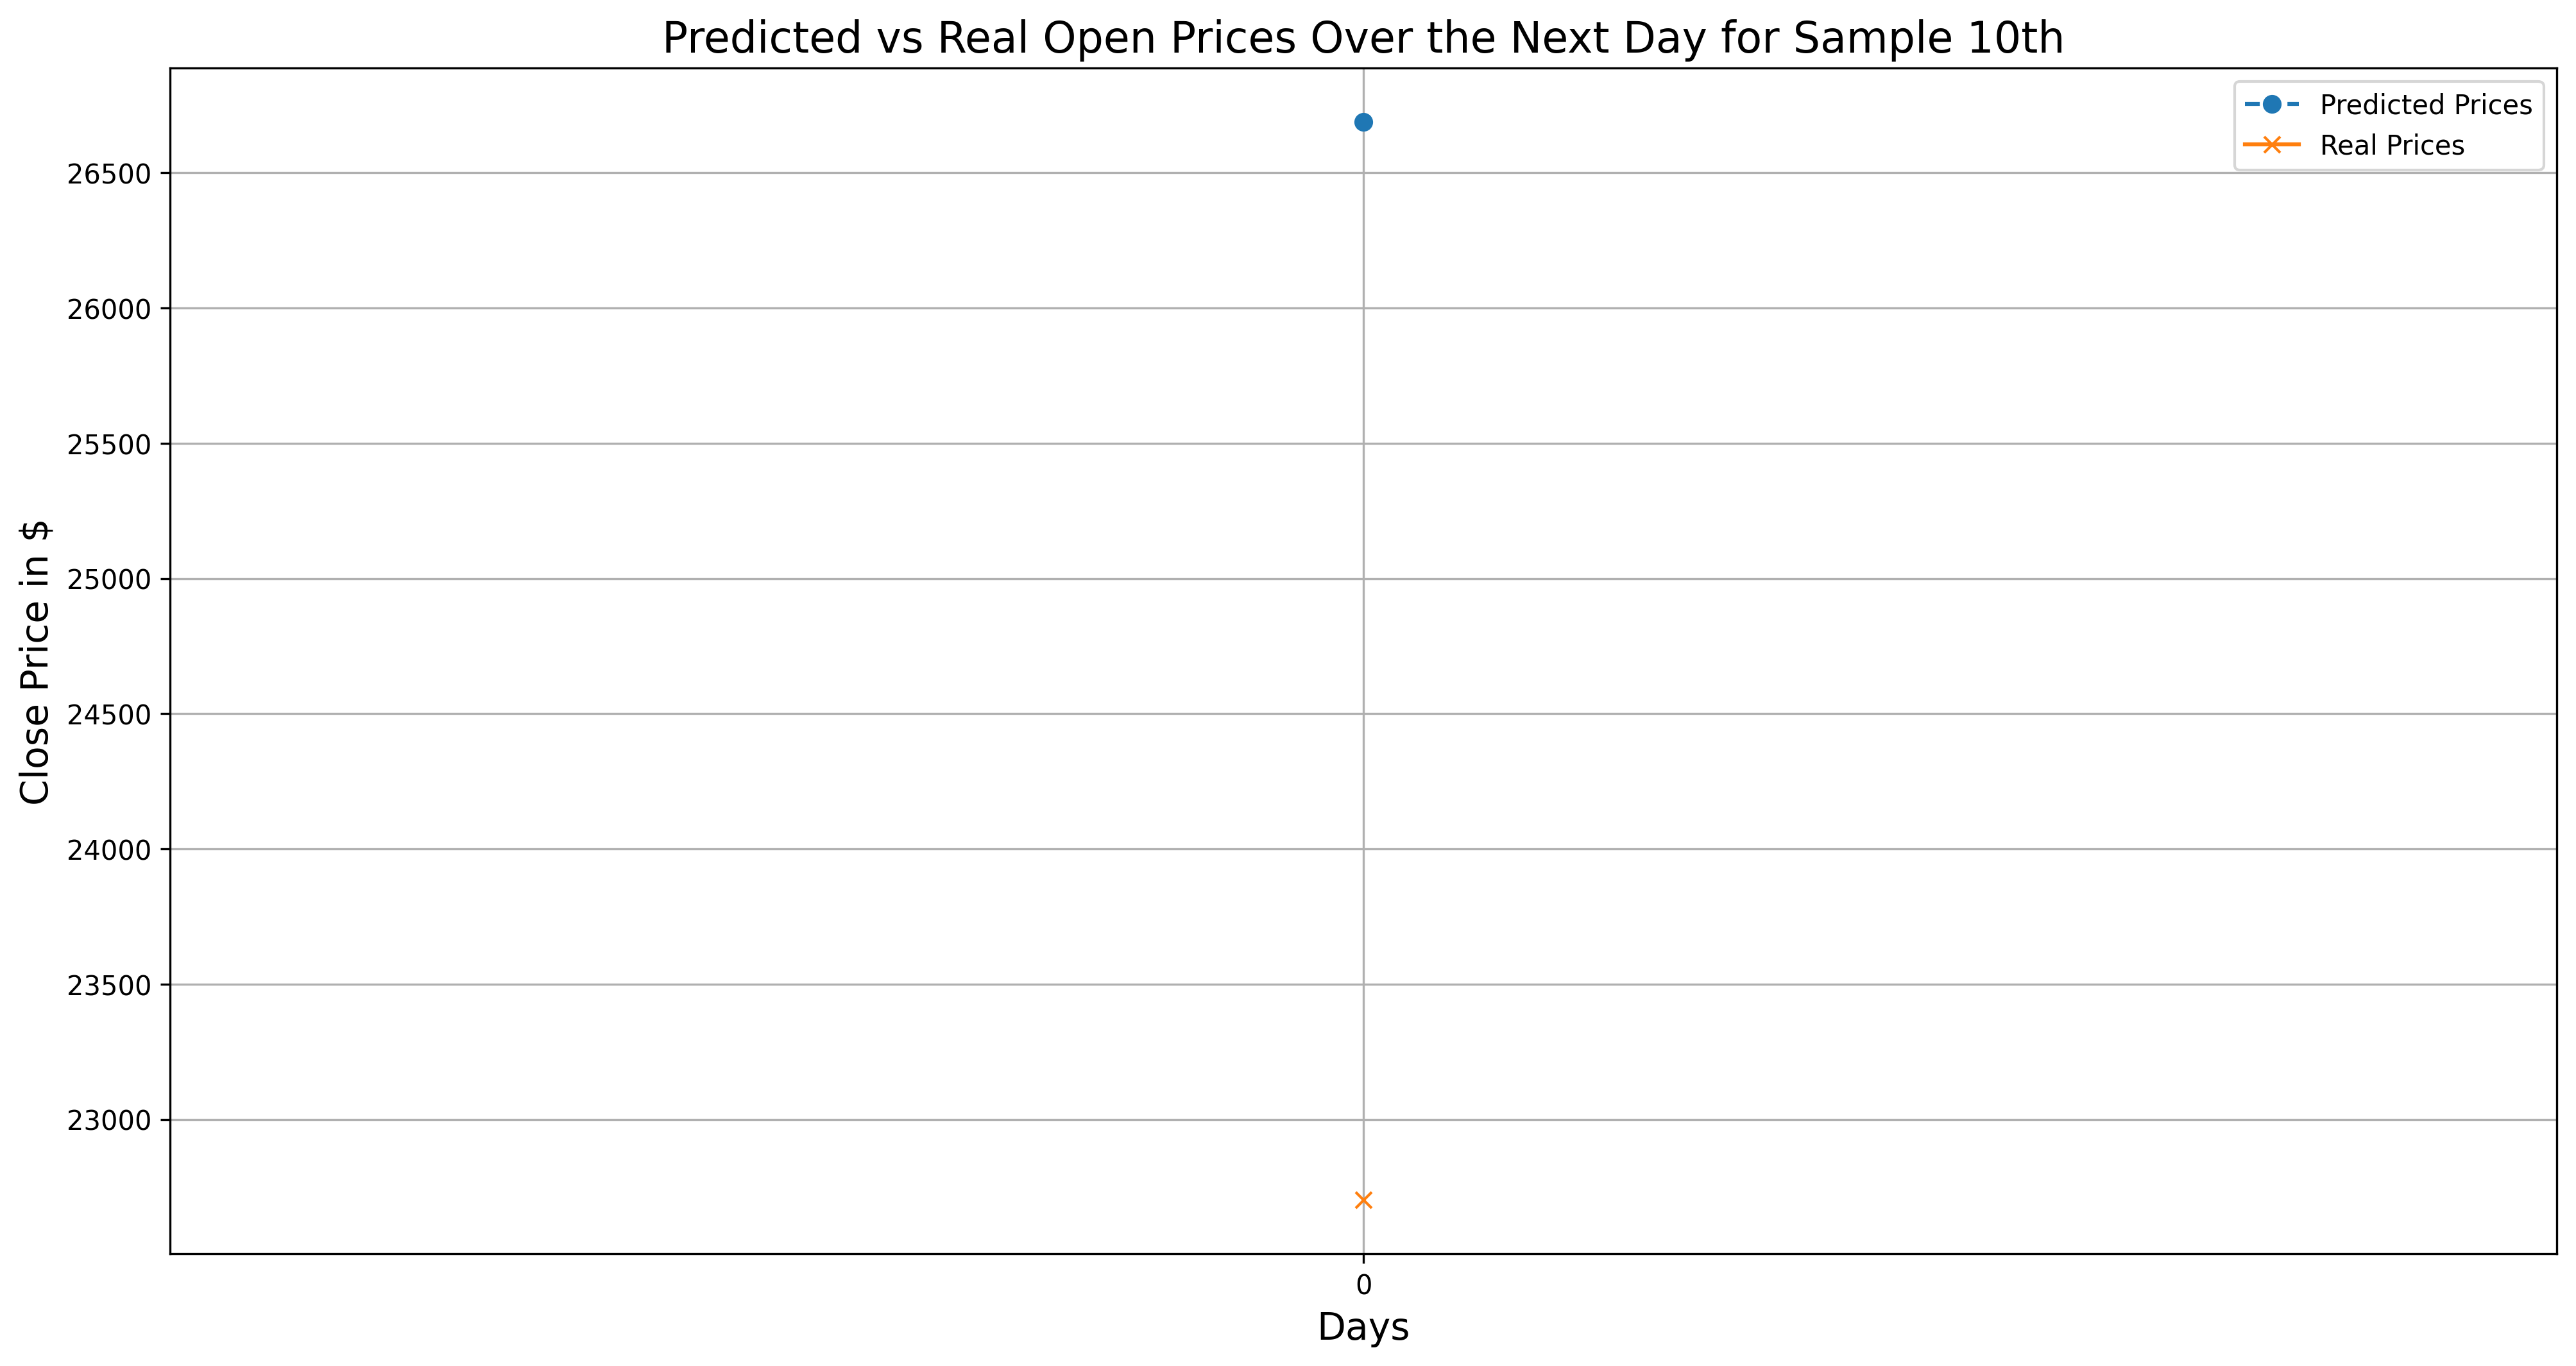

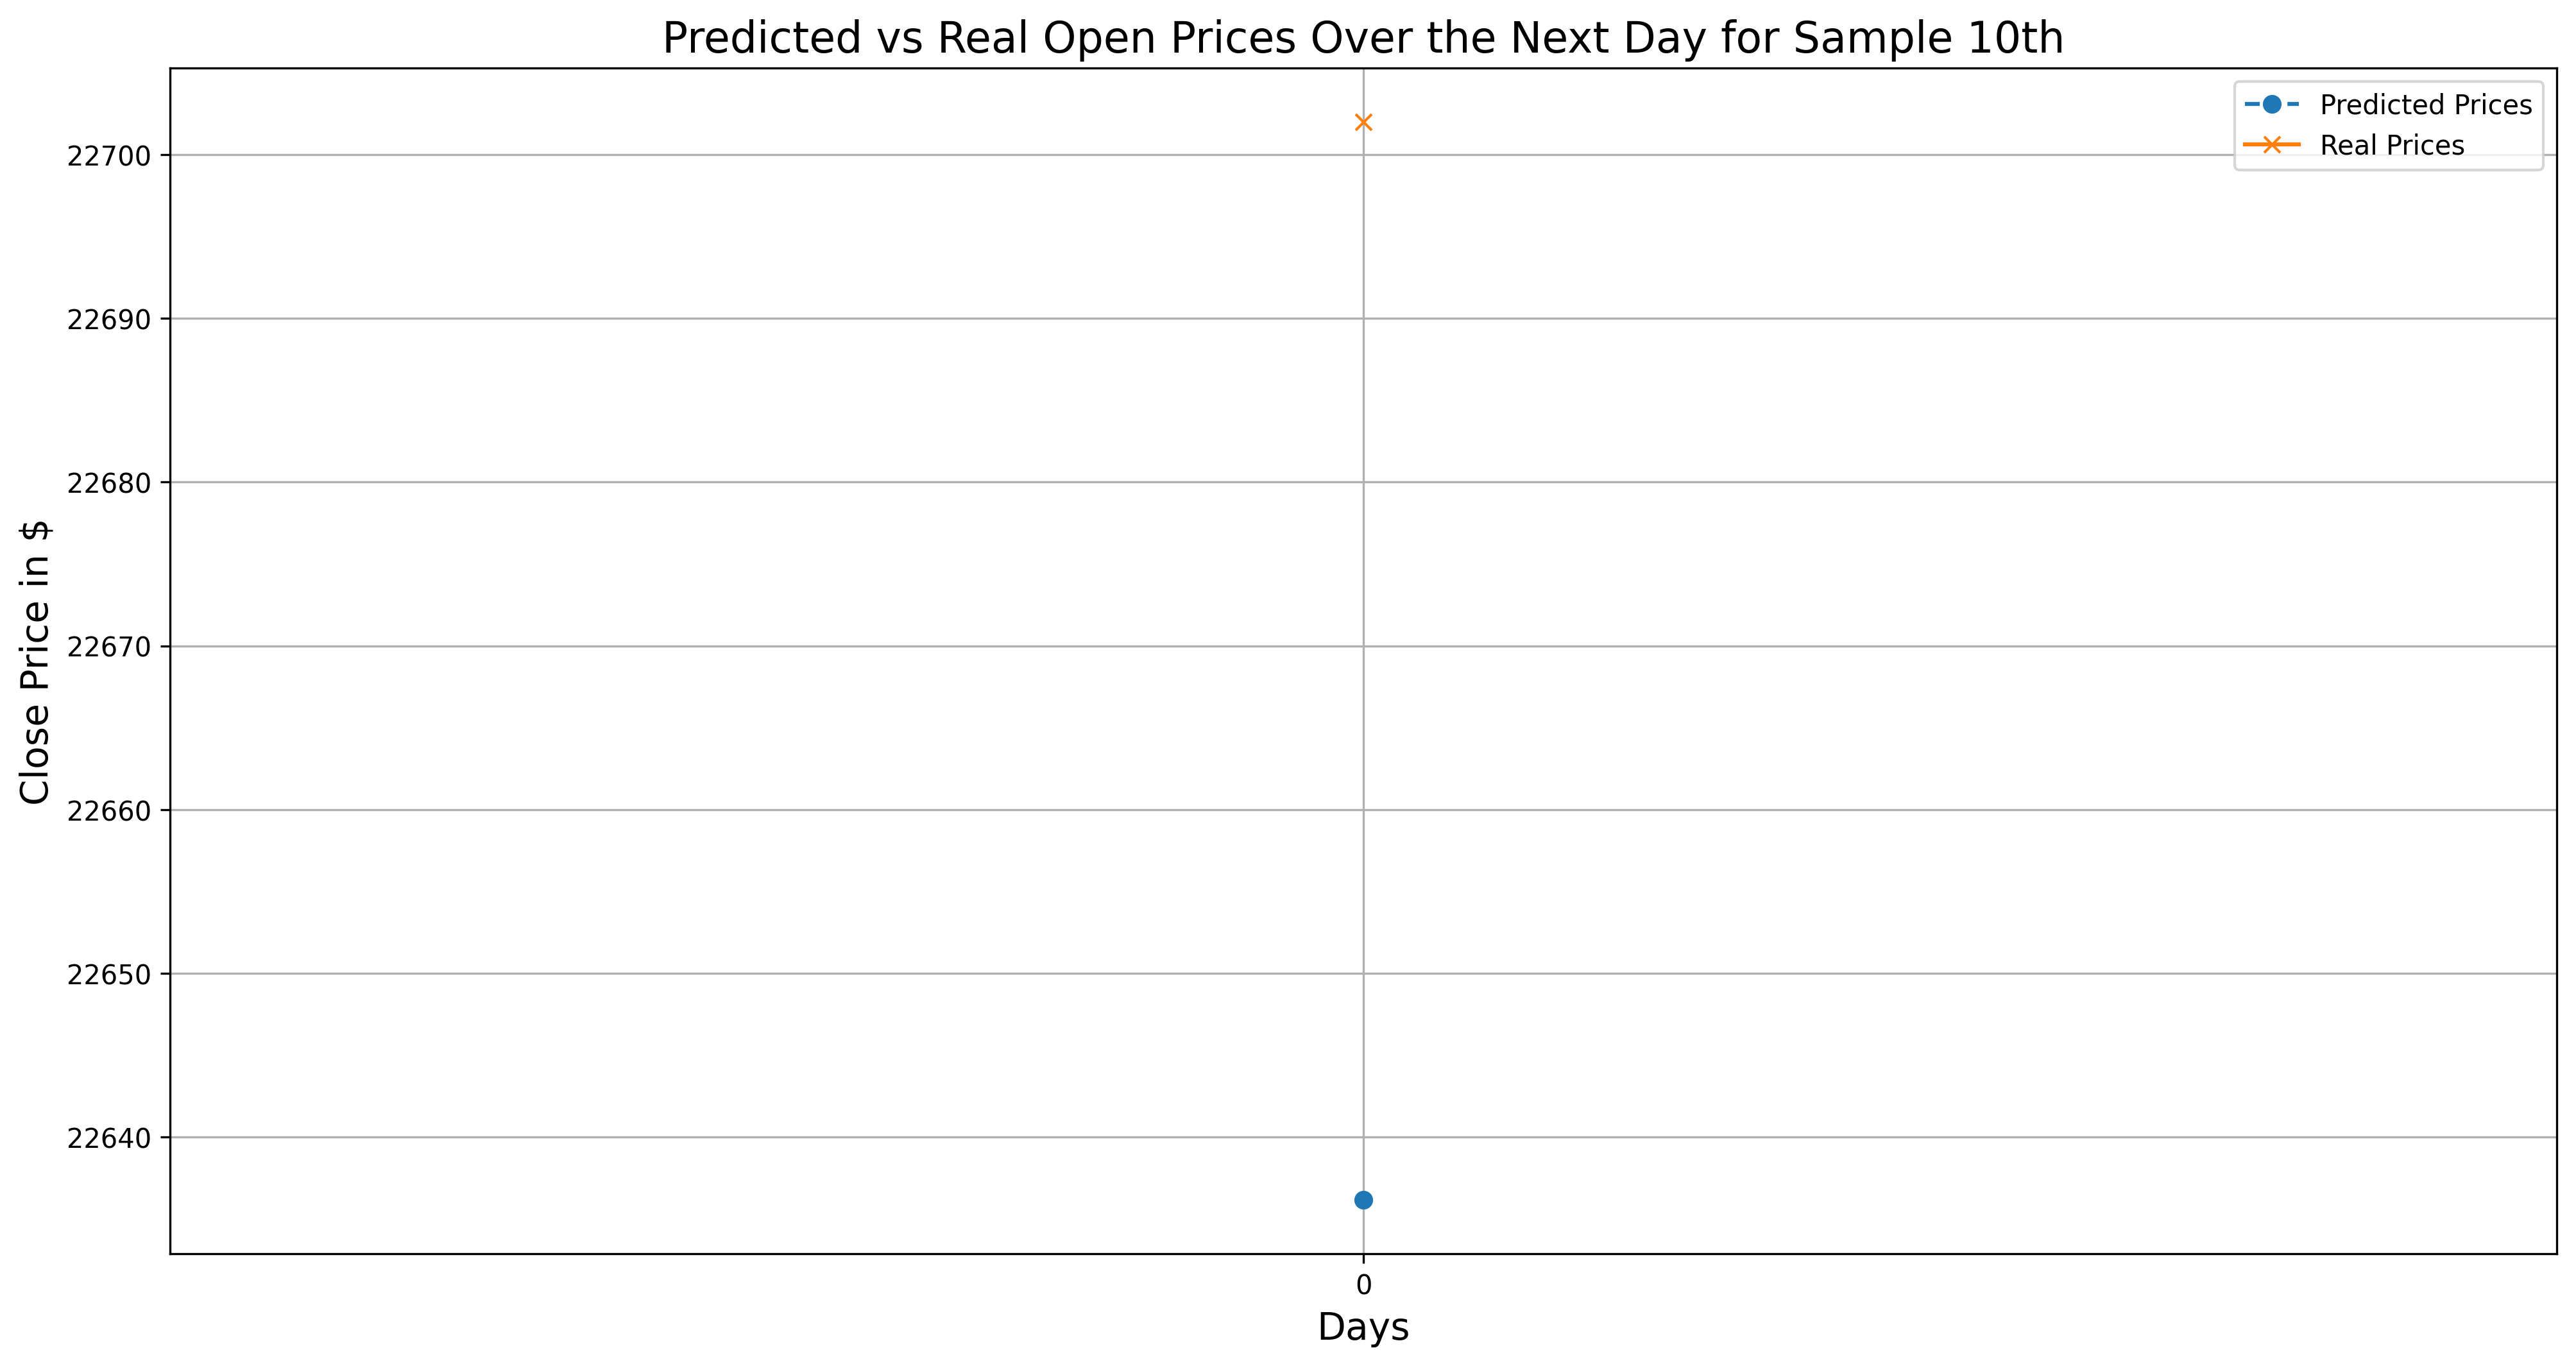

In [ ]:
plot_prediction_timestep(y_pred_denorm_bilstm, y_test, "BiLSTM")
plot_prediction_timestep(y_pred_denorm_lstm, y_test, "LSTM")